In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *
import plotter

%matplotlib inline
#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [3]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs_test = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2', 'mcf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))


colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

## Plot stats

In [22]:
mock_name_train = 'aemulus_fmaxmocks_train'
mock_tag_train = '_aemulus_fmaxmocks_train'

#training_dir_base = f'/home/users/ksf293/clust/results{mock_tag_train}'
training_dir_base = f'/mount/sirocco1/ksf293/clust/results{mock_tag_train}'
id_pairs_train = np.loadtxt('../tables/id_pairs_train.txt', delimiter=',', dtype=int)
id_pairs_test = np.loadtxt('../tables/id_pairs_test.txt', delimiter=',', dtype=int)

In [23]:
mock_tag = '_unit'

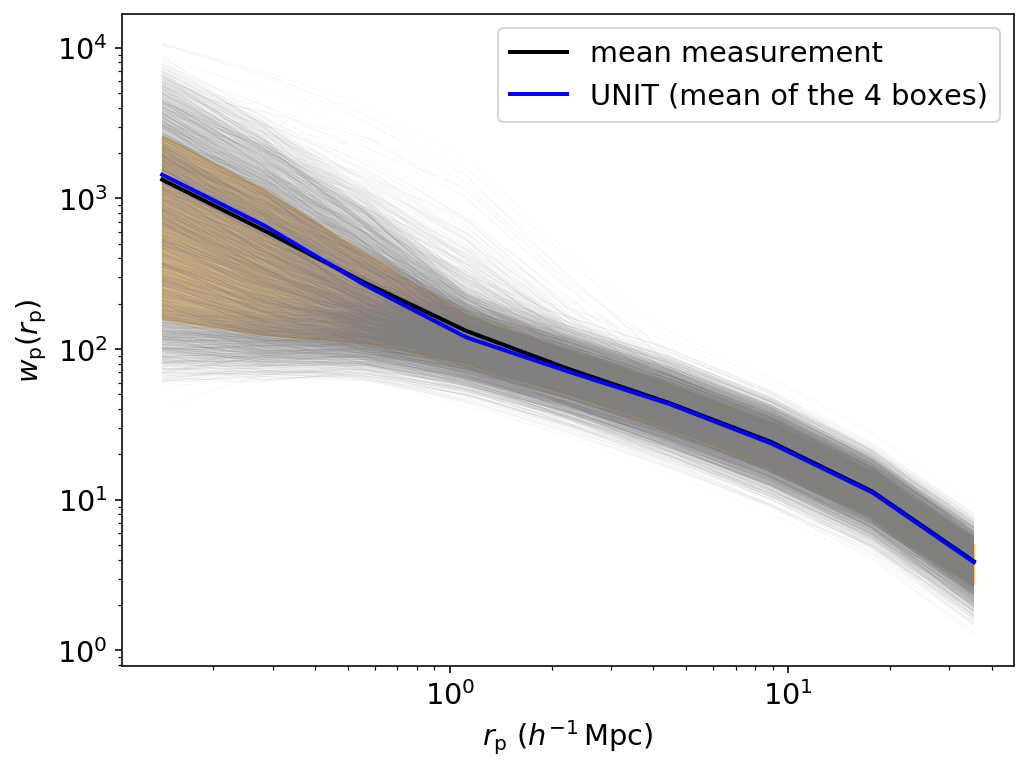

In [25]:
%matplotlib inline
statistic = 'wp'
#r_arr, y_train_arr = utils.load_statistics(statistic, training_dir_base, id_pairs_train)
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='UNIT (mean of the 4 boxes)')
plt.legend()

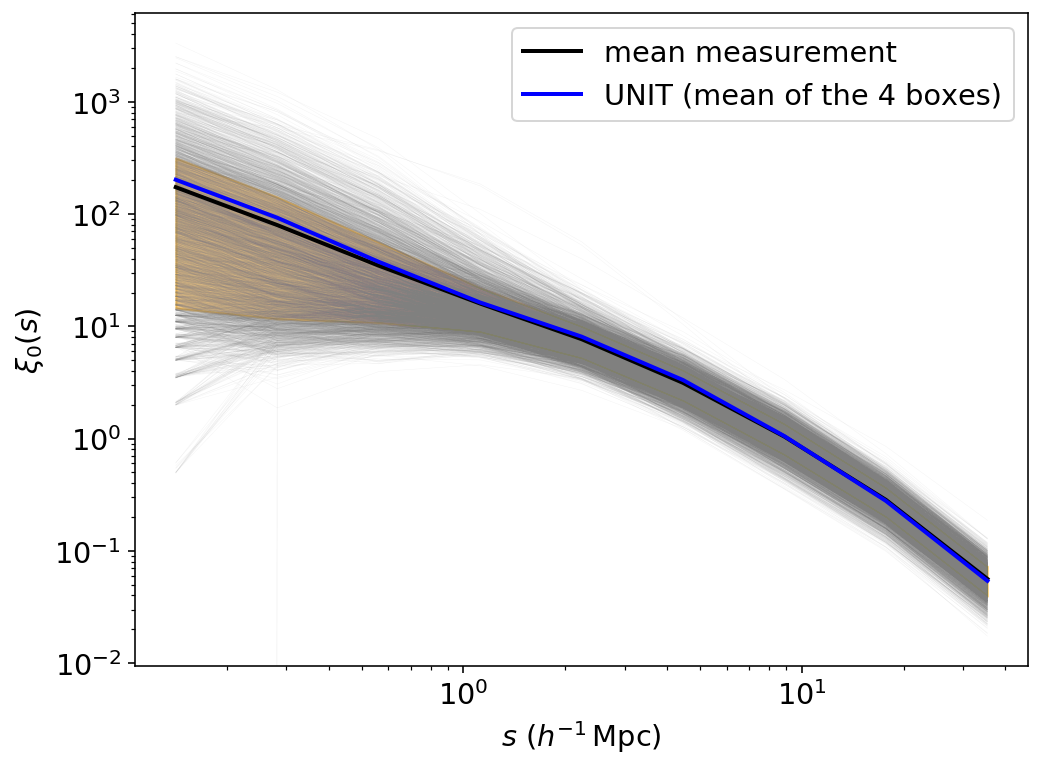

In [33]:
statistic = 'xi'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='UNIT (mean of the 4 boxes)')
plt.legend()

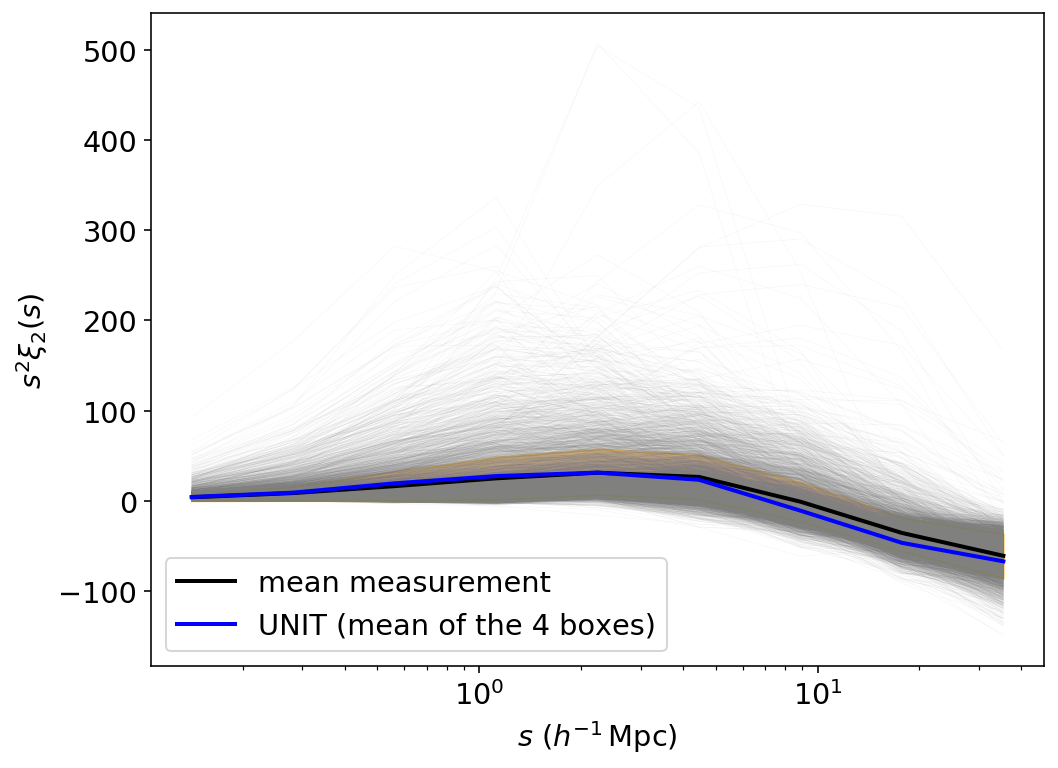

In [34]:
statistic = 'xi2'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, x_vals**2 * y_vals, lw=2, color='blue', label='UNIT (mean of the 4 boxes)')
plt.legend()

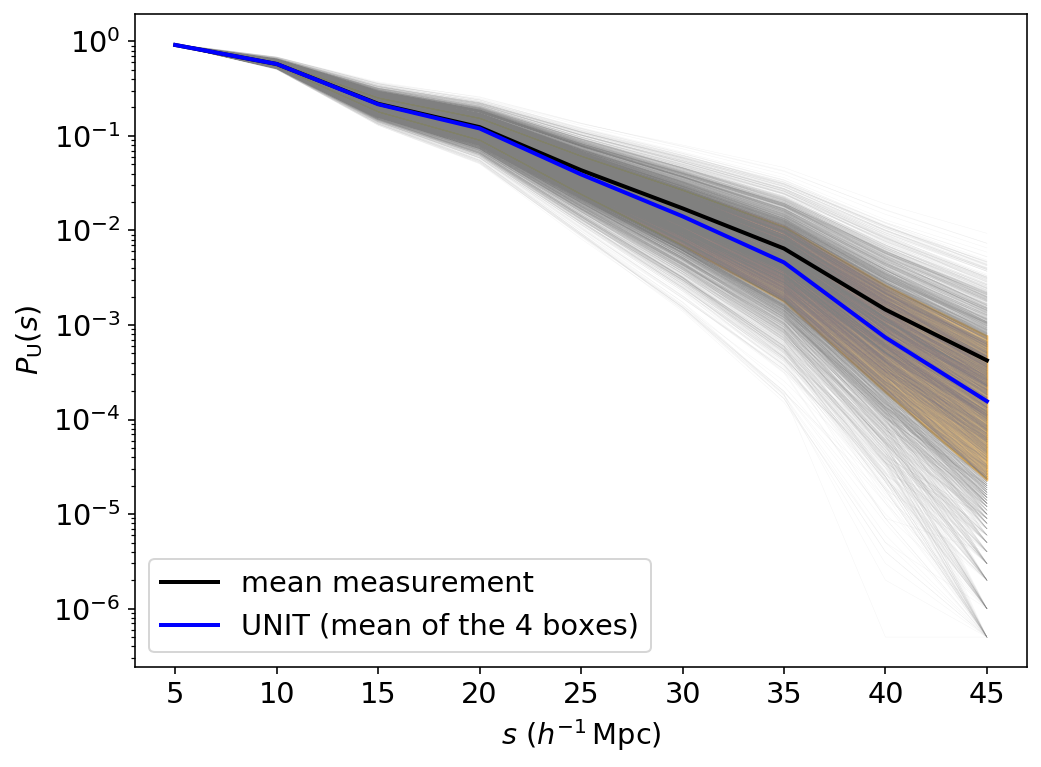

In [35]:
statistic = 'upf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='UNIT (mean of the 4 boxes)')
plt.legend()

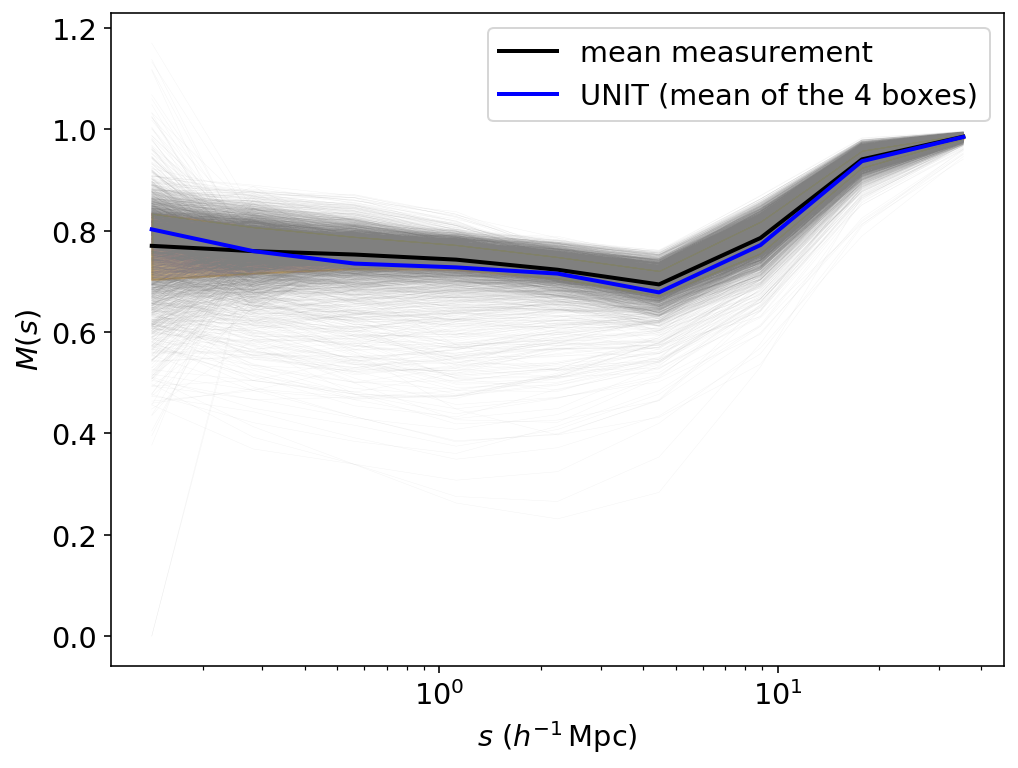

In [36]:
statistic = 'mcf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='UNIT (mean of the 4 boxes)')
plt.legend()

# chains

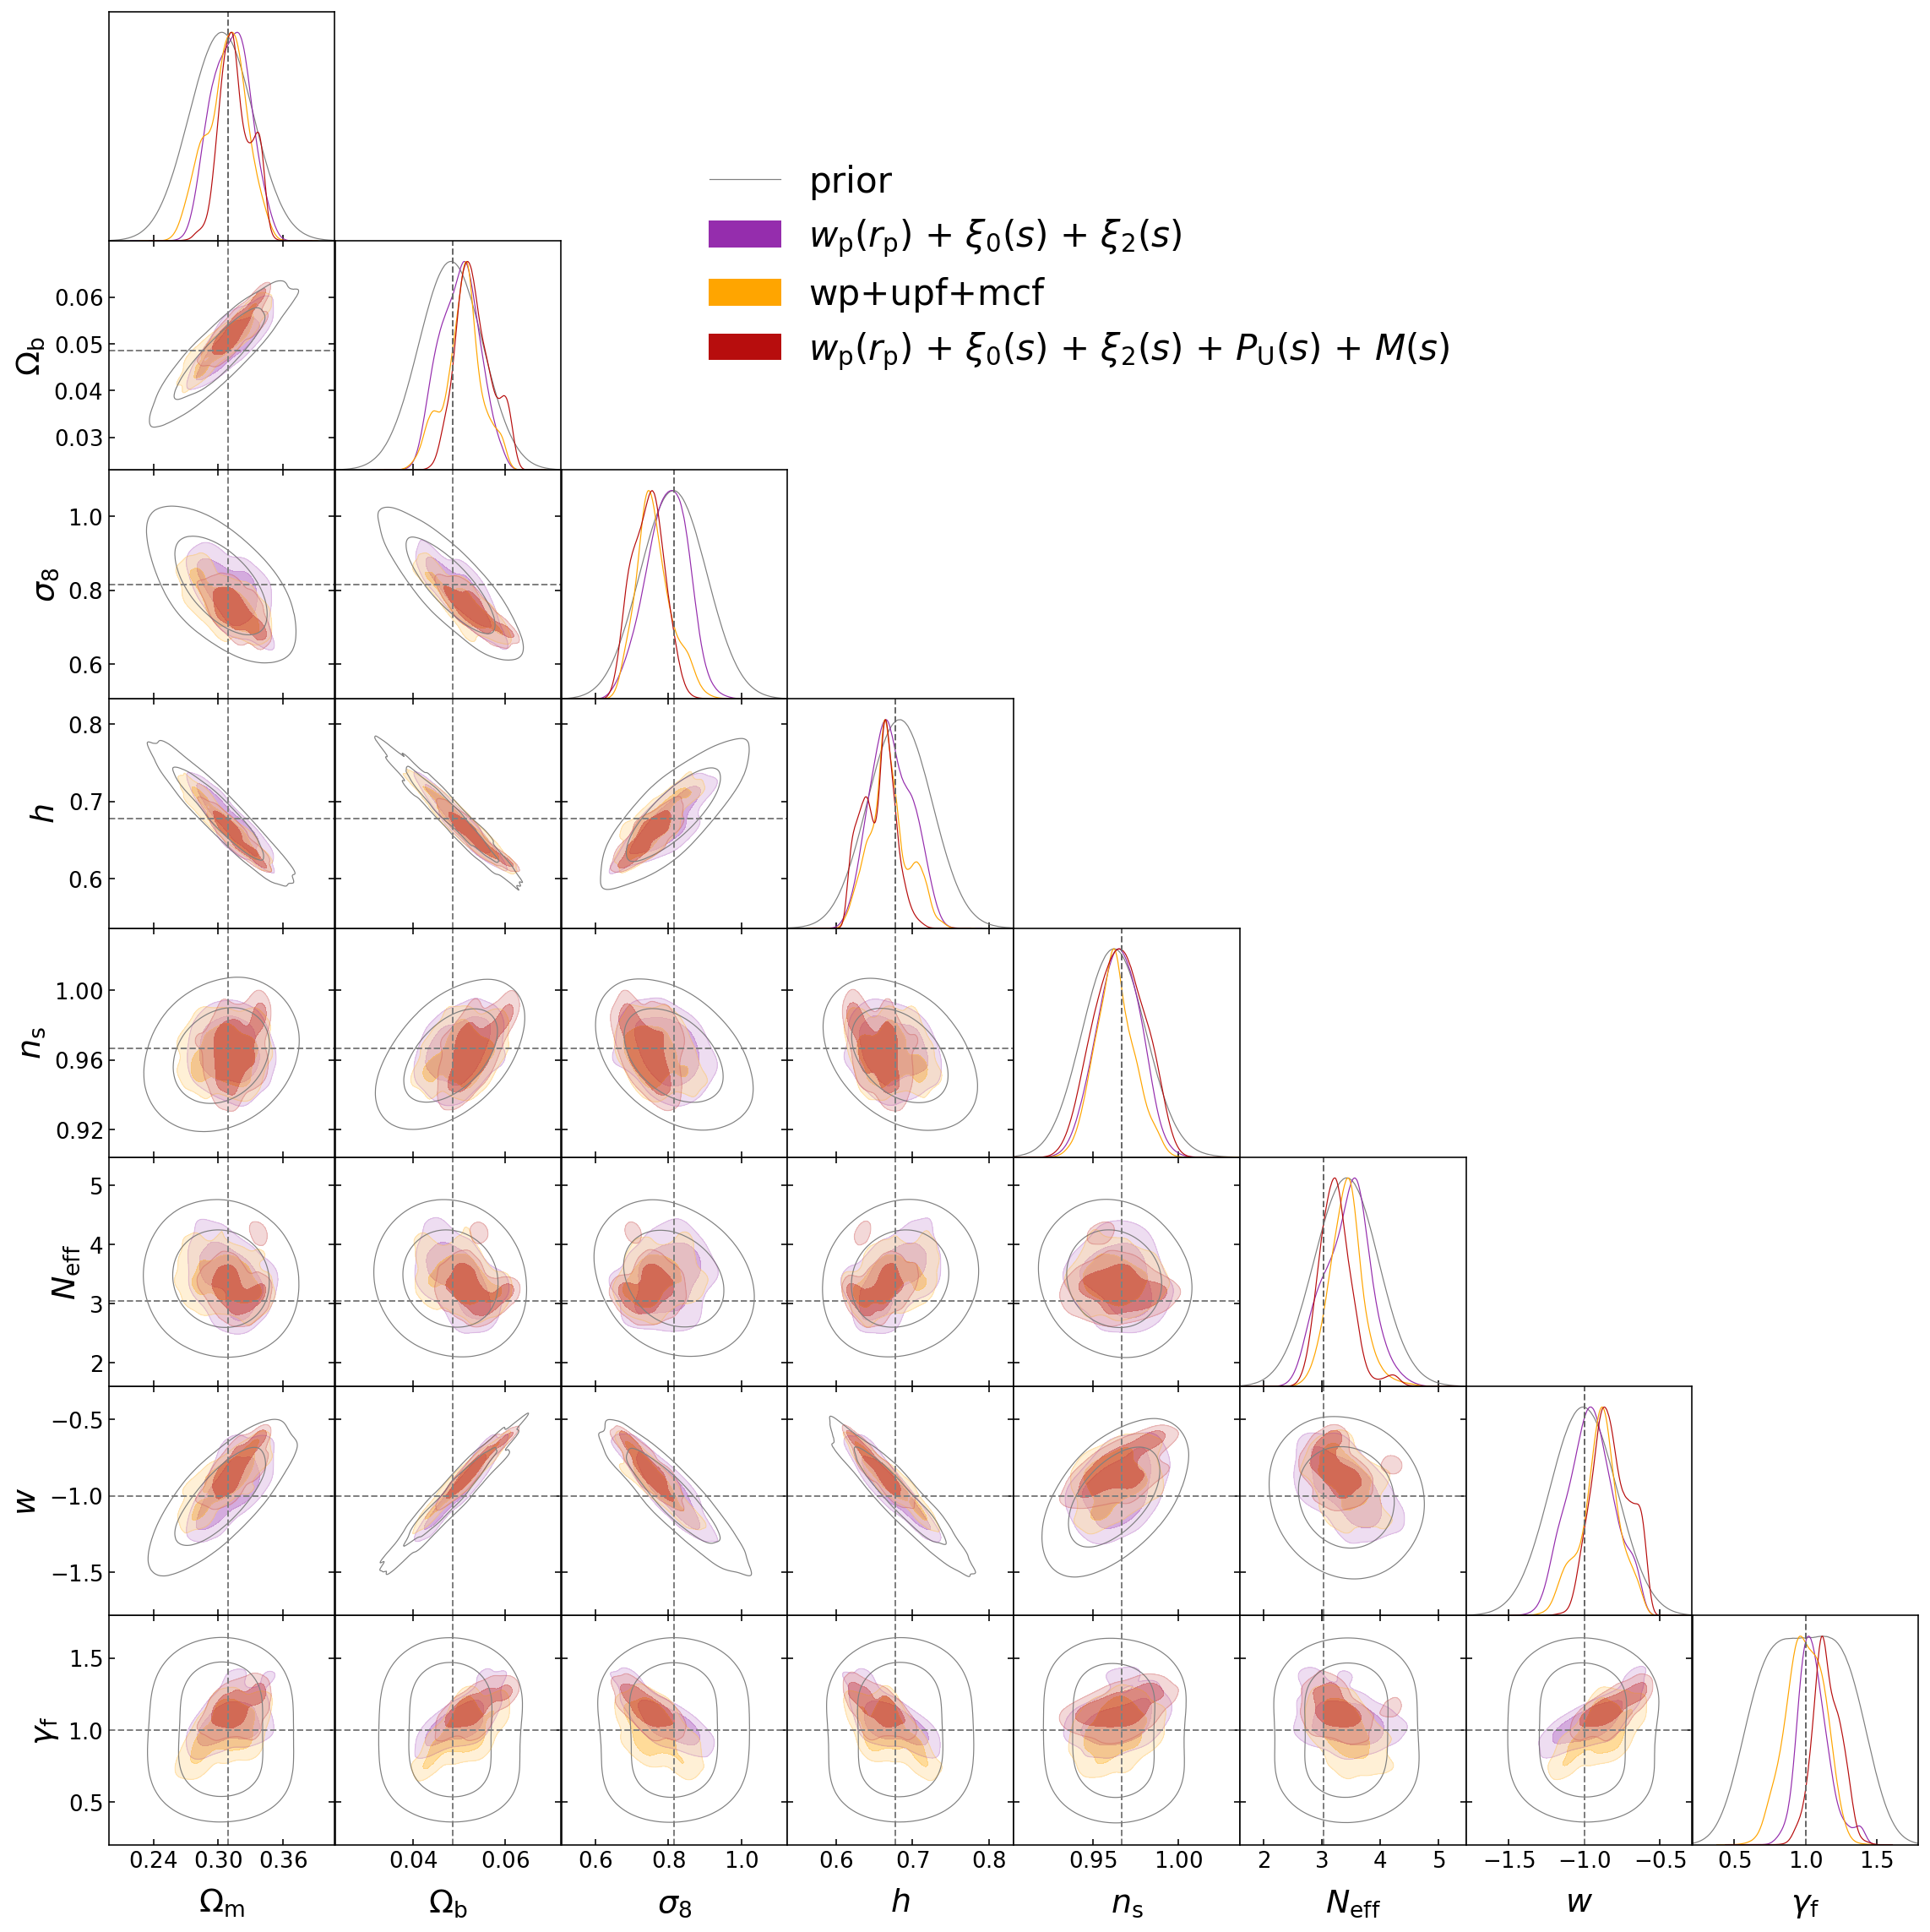

In [19]:
%matplotlib inline
chaintags = [
             #'wp_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_unit_aemulus_fmaxmocks_smoothboth',
             'wp_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          'wp+upf+mcf',
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

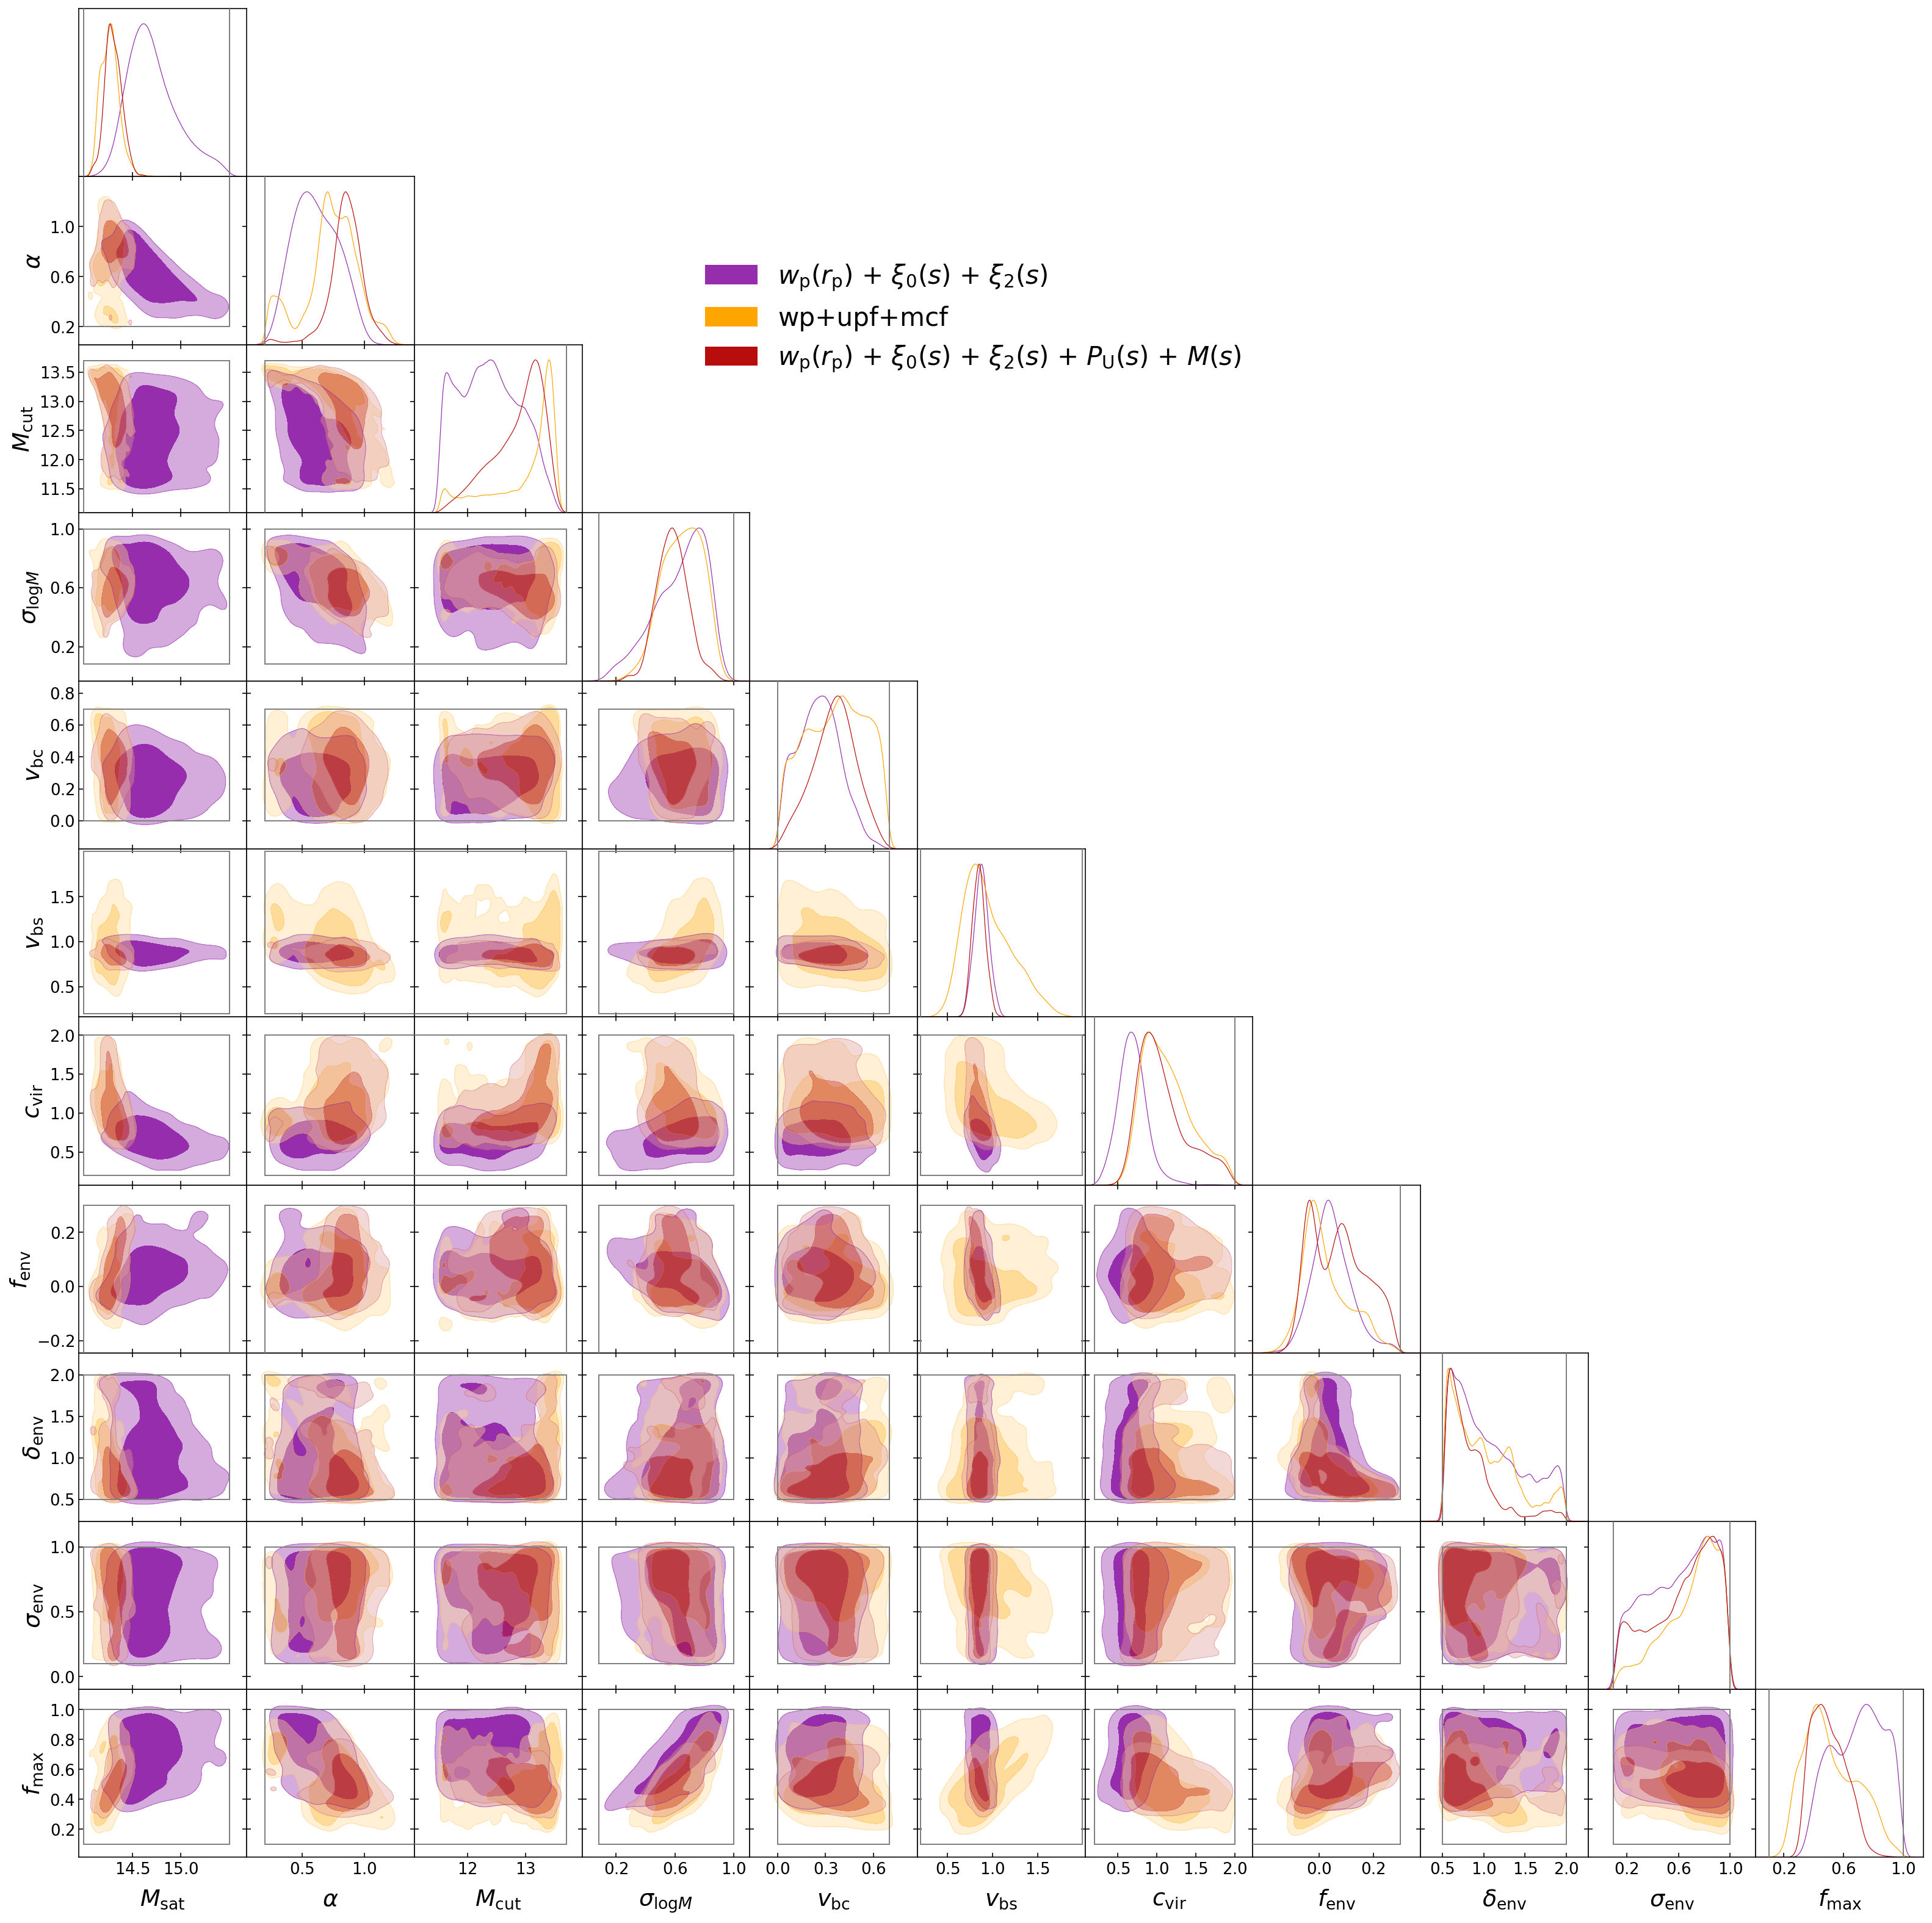

In [31]:
%matplotlib inline
chaintags = [
             #'wp_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_unit_aemulus_fmaxmocks_smoothboth',
             'wp_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          'wp+upf+mcf',
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=hod_nof_param_names,
                          plot_hard_prior=True)

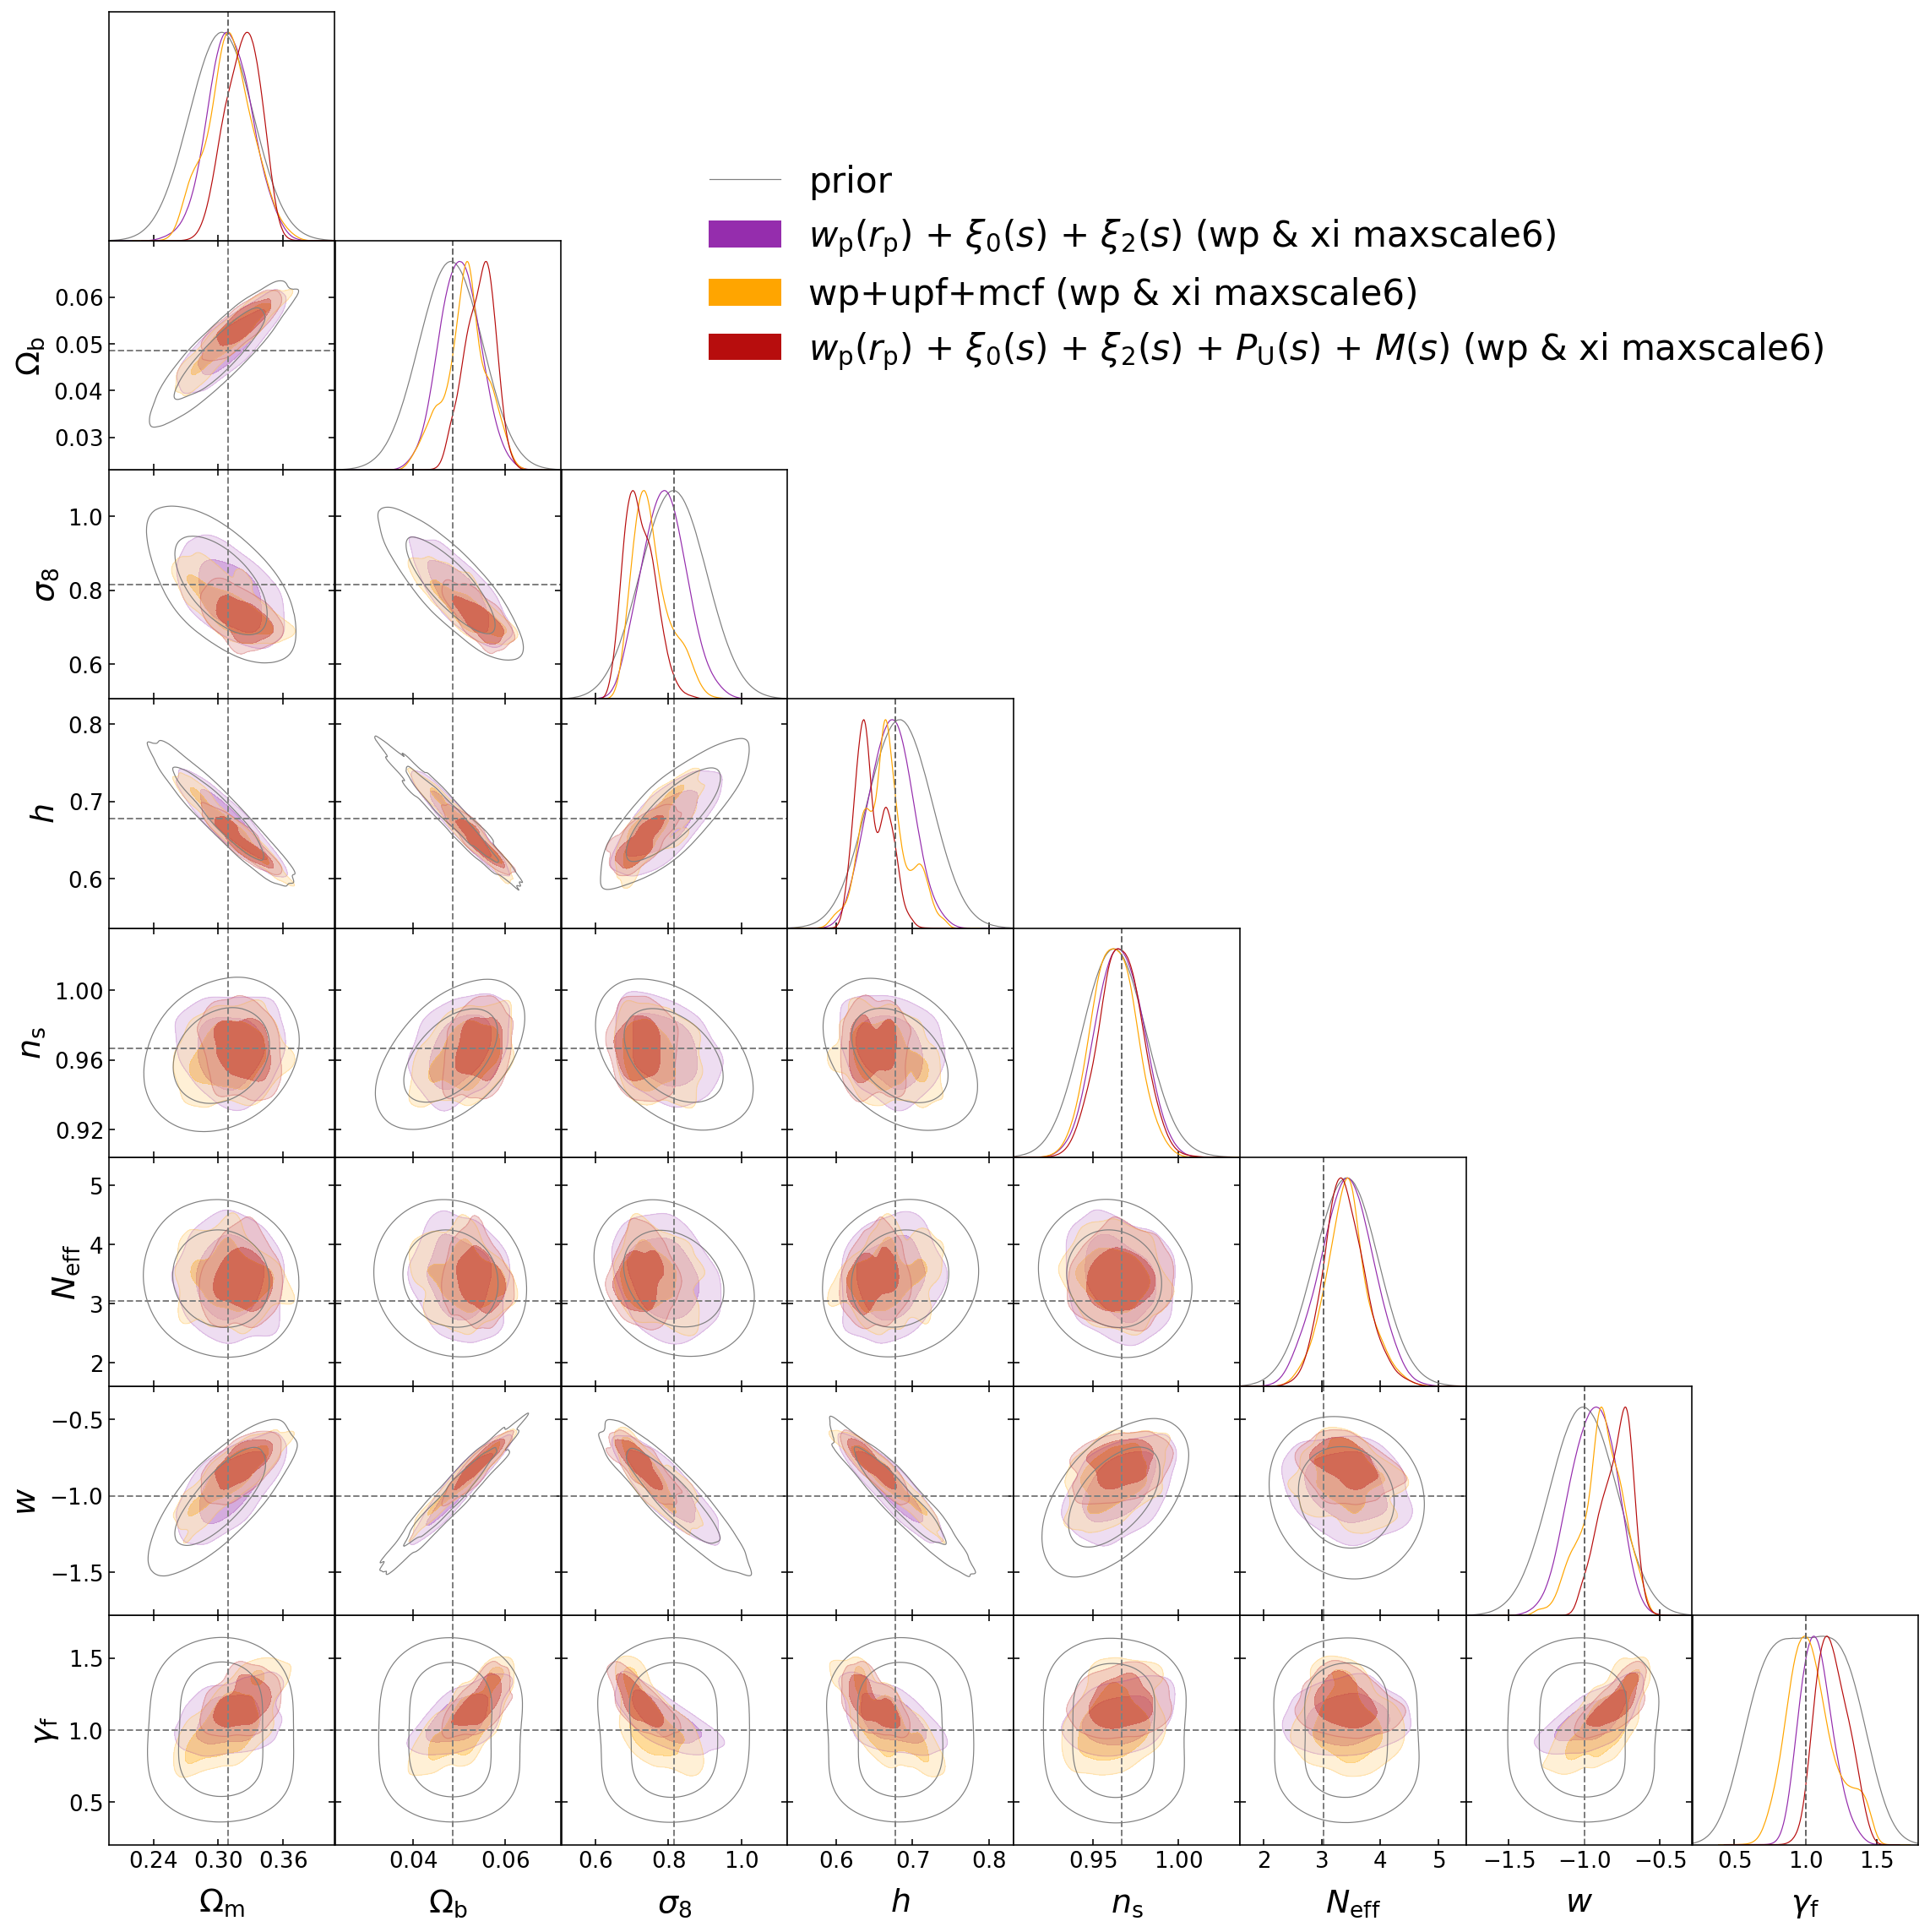

In [30]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_upf_mcf_unit_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
extra_tag = ' (wp & xi maxscale6)'
colors = [
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [
          labels_addin_full[2]+extra_tag, 
          'wp+upf+mcf'+extra_tag,
          labels_addin_full[4]+extra_tag
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

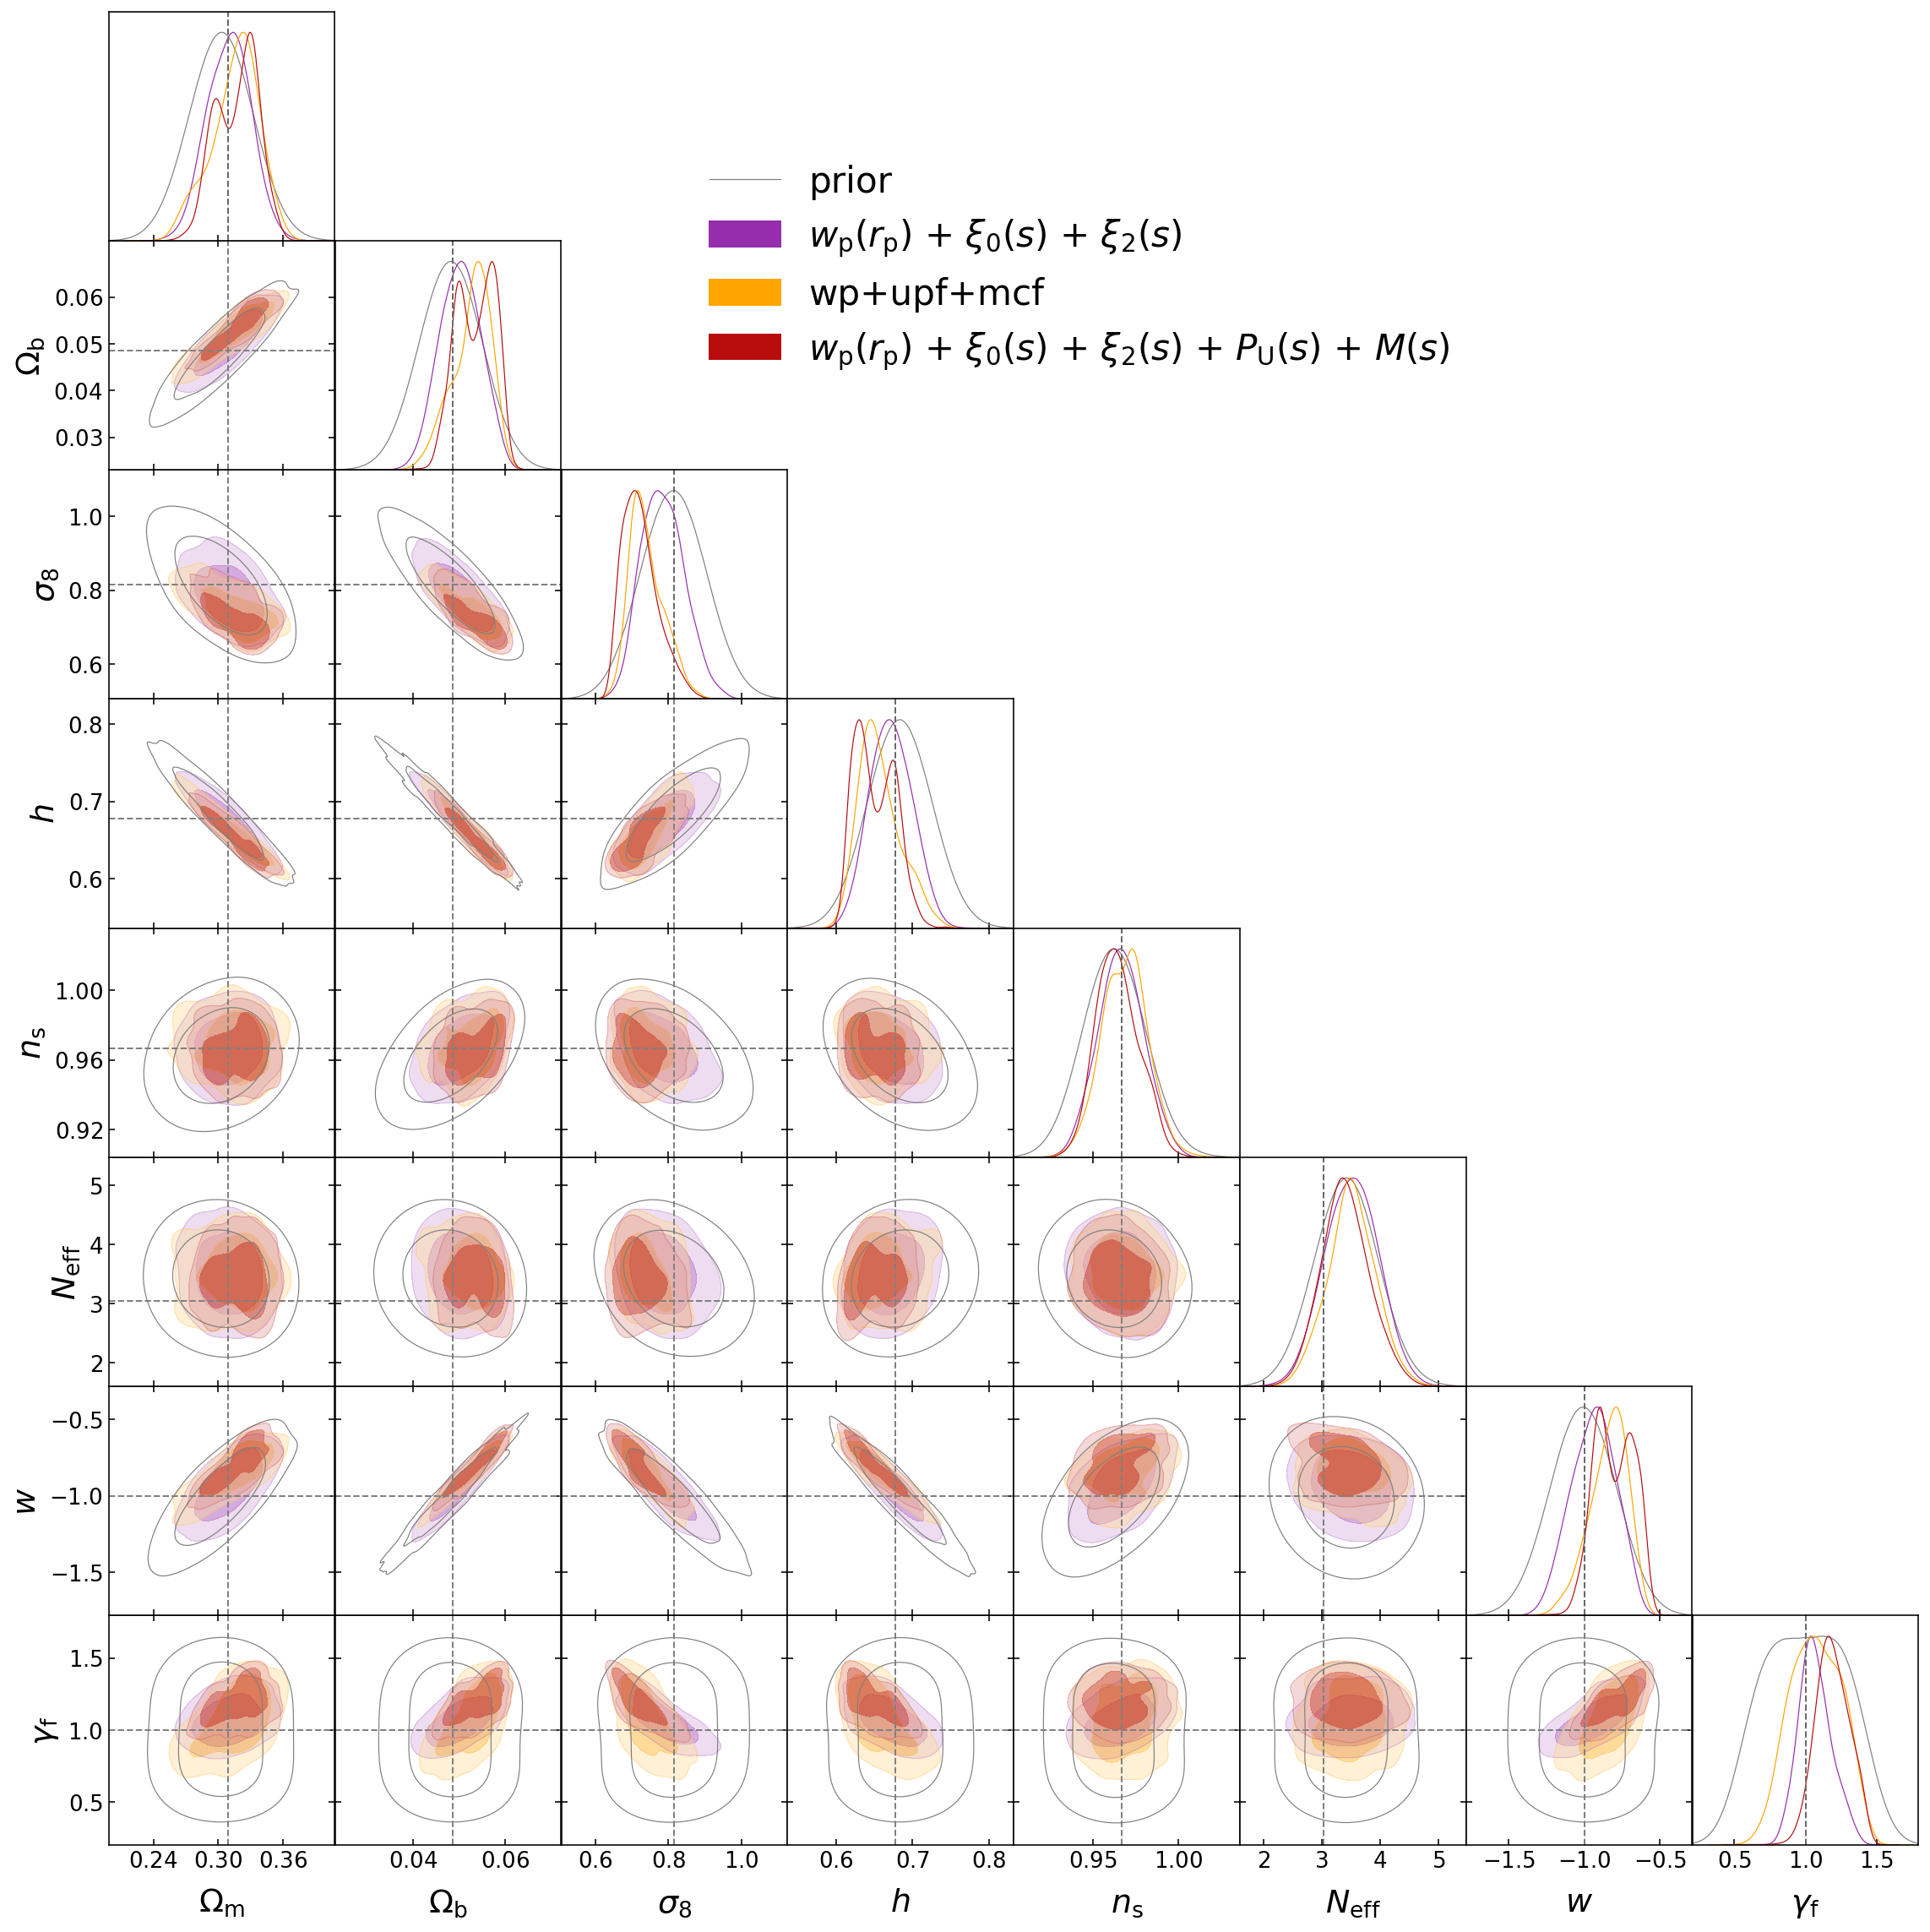

In [6]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_aemulus_fmaxmocks_smoothboth_allmaxscale6',
             'wp_upf_mcf_unit_aemulus_fmaxmocks_smoothboth_allmaxscale6',
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth_allmaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [
          labels_addin_full[2], 
          'wp+upf+mcf',
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

In [8]:
results_dict_unit = defaultdict(dict)

stat_strs = ['wp_xi_xi2', 'wp_xi_xi2_upf_mcf']
for stat_str in stat_strs:
    print(stat_str)
    chaintag = f'{stat_str}_unit_aemulus_fmaxmocks_smoothboth'
    result_dict_single = utils.construct_results_dict(chaintag)
    results_dict_unit[stat_str] = result_dict_single

wp_xi_xi2
wp_xi_xi2_upf_mcf


In [9]:
results_dict_unit

defaultdict(dict,
            {'wp_xi_xi2': {'Omega_m': defaultdict(dict,
                          {'mean': 0.3113967227644113,
                           'median': 0.3117962324732434,
                           'uncertainty': 0.01869735792676608,
                           'truth': 0.3089}),
              'Omega_b': defaultdict(dict,
                          {'mean': 0.050040104679567564,
                           'median': 0.05021923274222678,
                           'uncertainty': 0.004494176477311641,
                           'truth': 0.0486}),
              'sigma_8': defaultdict(dict,
                          {'mean': 0.7951189686167789,
                           'median': 0.7978357628219738,
                           'uncertainty': 0.05911585448108014,
                           'truth': 0.8147}),
              'h': defaultdict(dict,
                          {'mean': 0.6726768997650615,
                           'median': 0.6705767704741982,
                        

In [18]:
for param_name in cosmo_withf_param_names:
    print(param_name)
    for stat_str in stat_strs:
        error = results_dict_unit[stat_str][param_name]['median'] - results_dict_unit[stat_str][param_name]['truth']
        error_sig = error / results_dict_unit[stat_str][param_name]['uncertainty']
        print(f'{stat_str}: {error_sig:.2f}')

Omega_m
wp_xi_xi2: 0.15
wp_xi_xi2_upf_mcf: 0.34
Omega_b
wp_xi_xi2: 0.36
wp_xi_xi2_upf_mcf: 1.01
sigma_8
wp_xi_xi2: -0.29
wp_xi_xi2_upf_mcf: -1.48
h
wp_xi_xi2: -0.23
wp_xi_xi2_upf_mcf: -0.84
n_s
wp_xi_xi2: -0.11
wp_xi_xi2_upf_mcf: -0.06
N_eff
wp_xi_xi2: 1.06
wp_xi_xi2_upf_mcf: 0.70
w
wp_xi_xi2: 0.28
wp_xi_xi2_upf_mcf: 1.22
f
wp_xi_xi2: 0.45
wp_xi_xi2_upf_mcf: 1.44


In [ ]:
results of the unit sim test are not as bad as uchuu but still not good. ive just done the fiducial values of alpha and scatter for now. first plot is with all scales included, second is excluding the two largest-scale bins for wp and xi, as those showed a bias in the aemulus tests. interestingly the results are less biased when including all scales for the 5-observable test.

when including all scales, wp+xi+xi2 all recovers parameters all within 0.5sigma, except for Neff which is 1sigma. for wp+xi+xi2+upf+mcf, sigma_8 and gamma_f are biased by 1.5sigma; omega_b and w by ~1sigma.

all the statistics (mean of 4 boxes, in blue) are well within 1sigma of the mean of the training data.

# other chain tests

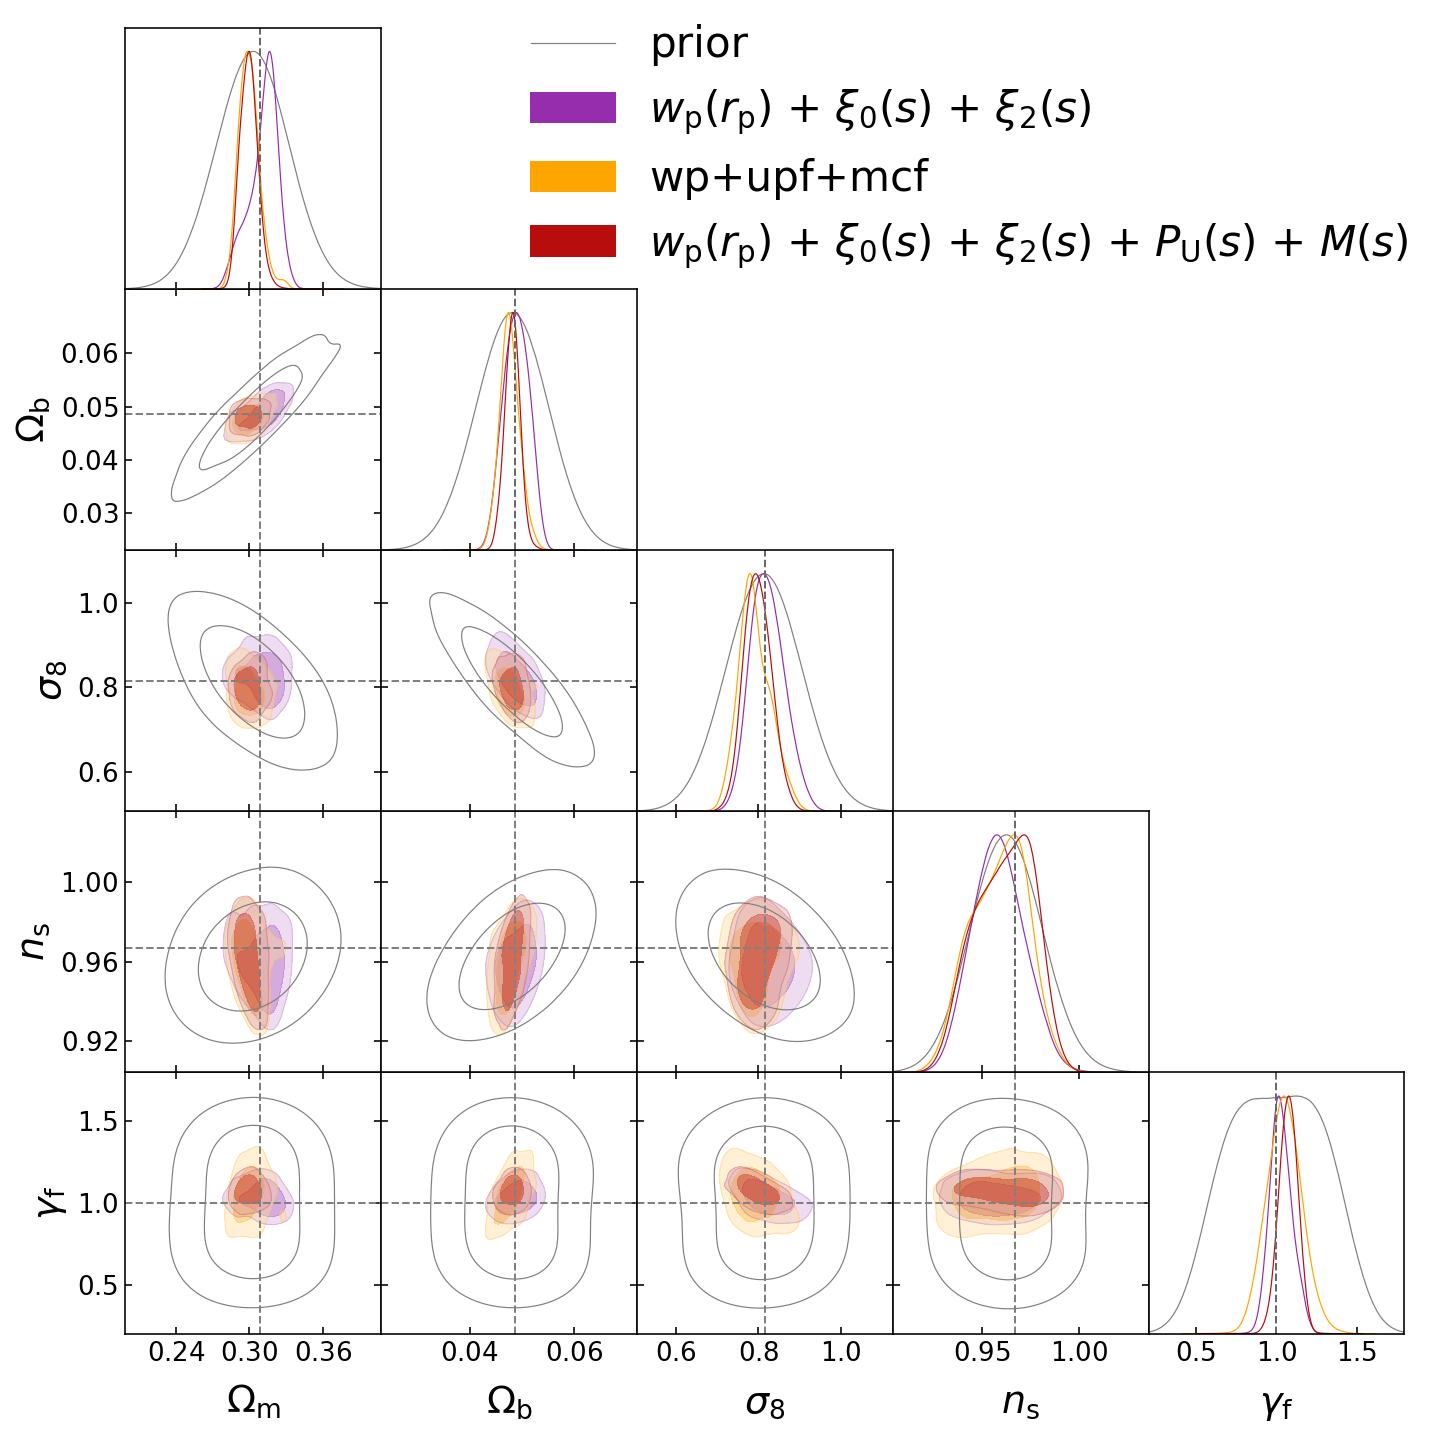

In [42]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth',
             'wp_upf_mcf_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          'wp+upf+mcf',
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=["Omega_m", "Omega_b", "sigma_8", "n_s", "f"],
                          chaintag_prior='prior')

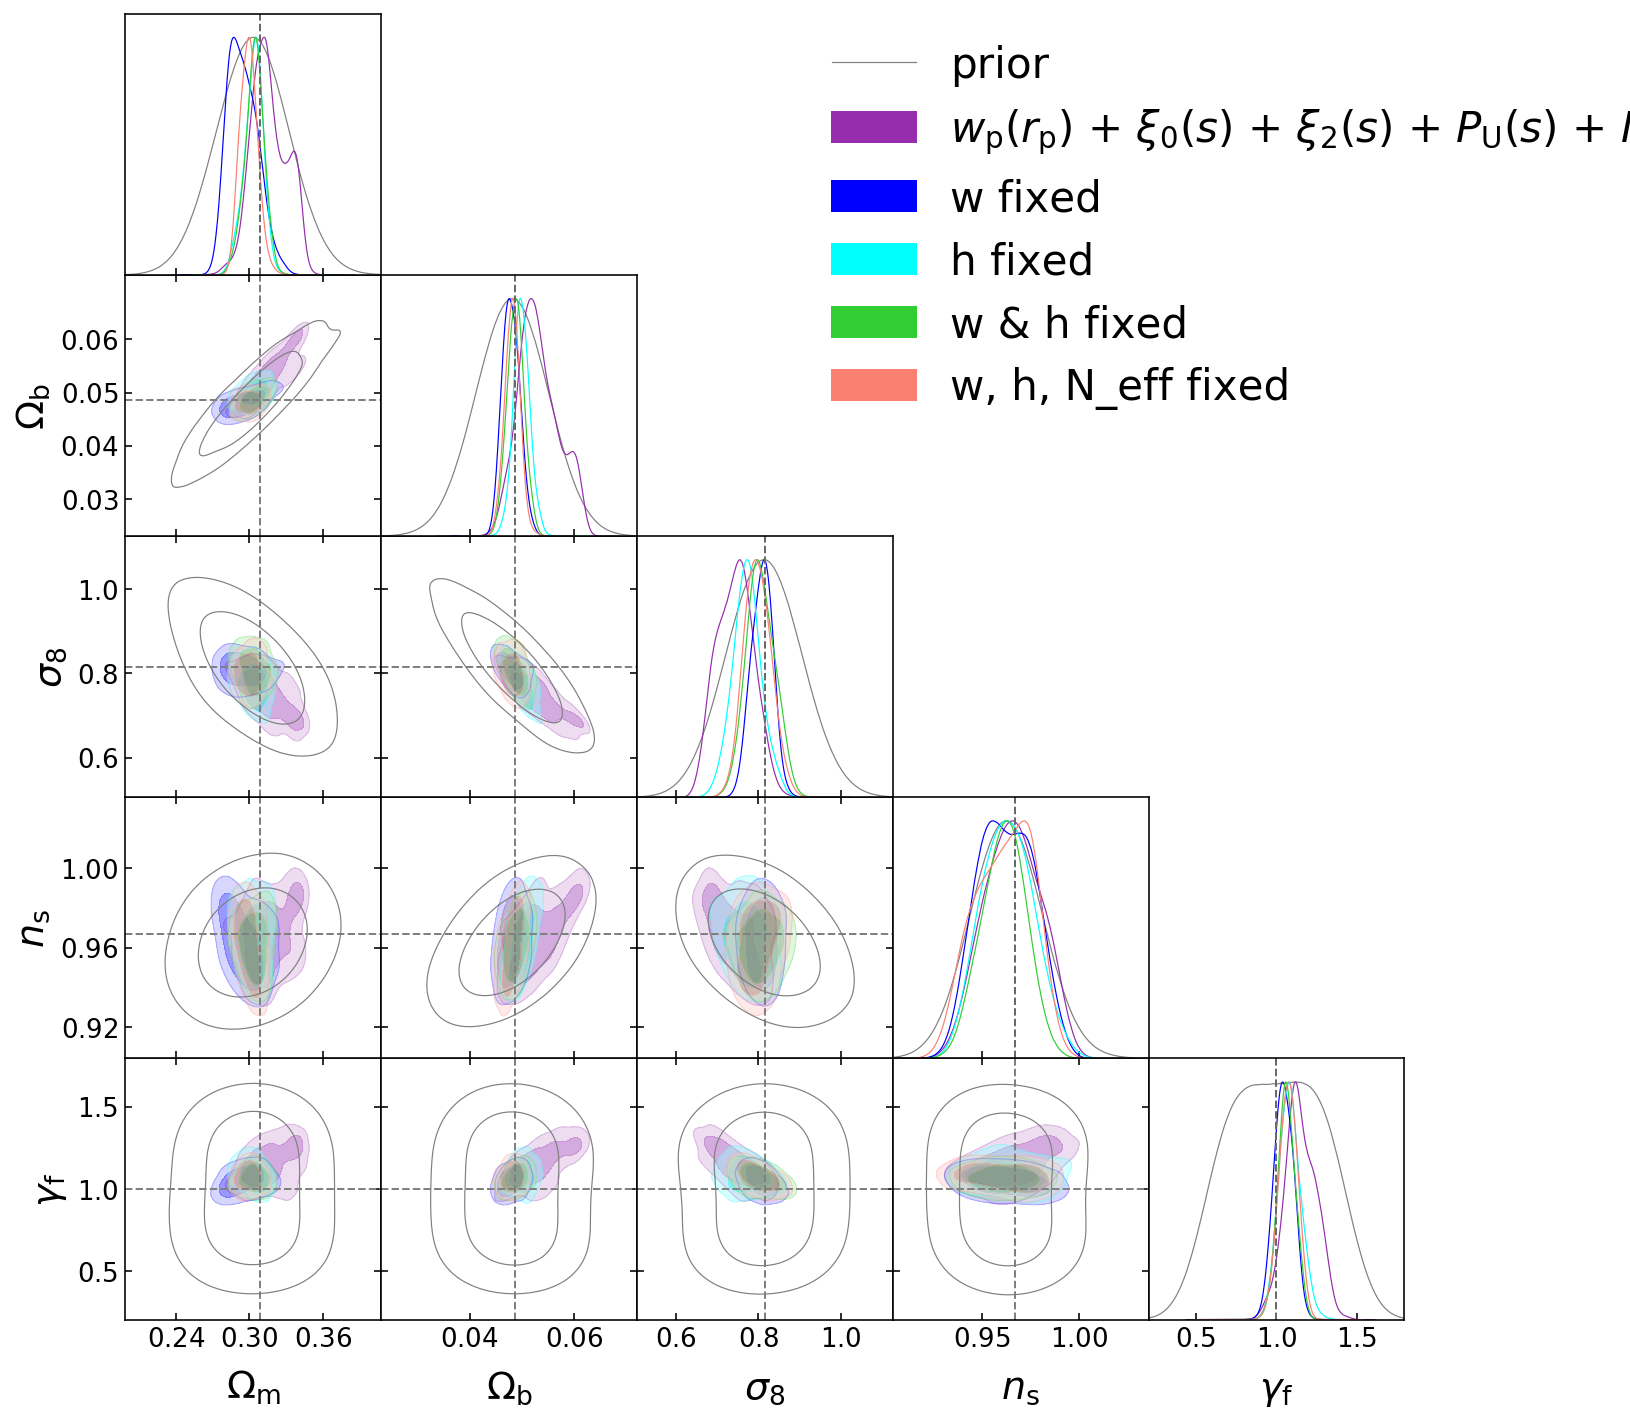

In [55]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_fixw_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_fixh_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_fixwh_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          'blue', 'cyan', 'limegreen', 'salmon']
labels = [#labels_addin_full[0], 
          labels_addin_full[4], 
          'w fixed',
          'h fixed', 
          'w & h fixed',
          'w, h, N_eff fixed'
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.5, 0.7),
                          legend_fontsize=24,
                          params_toplot=["Omega_m", "Omega_b", "sigma_8", "n_s", "f"],
                          #params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

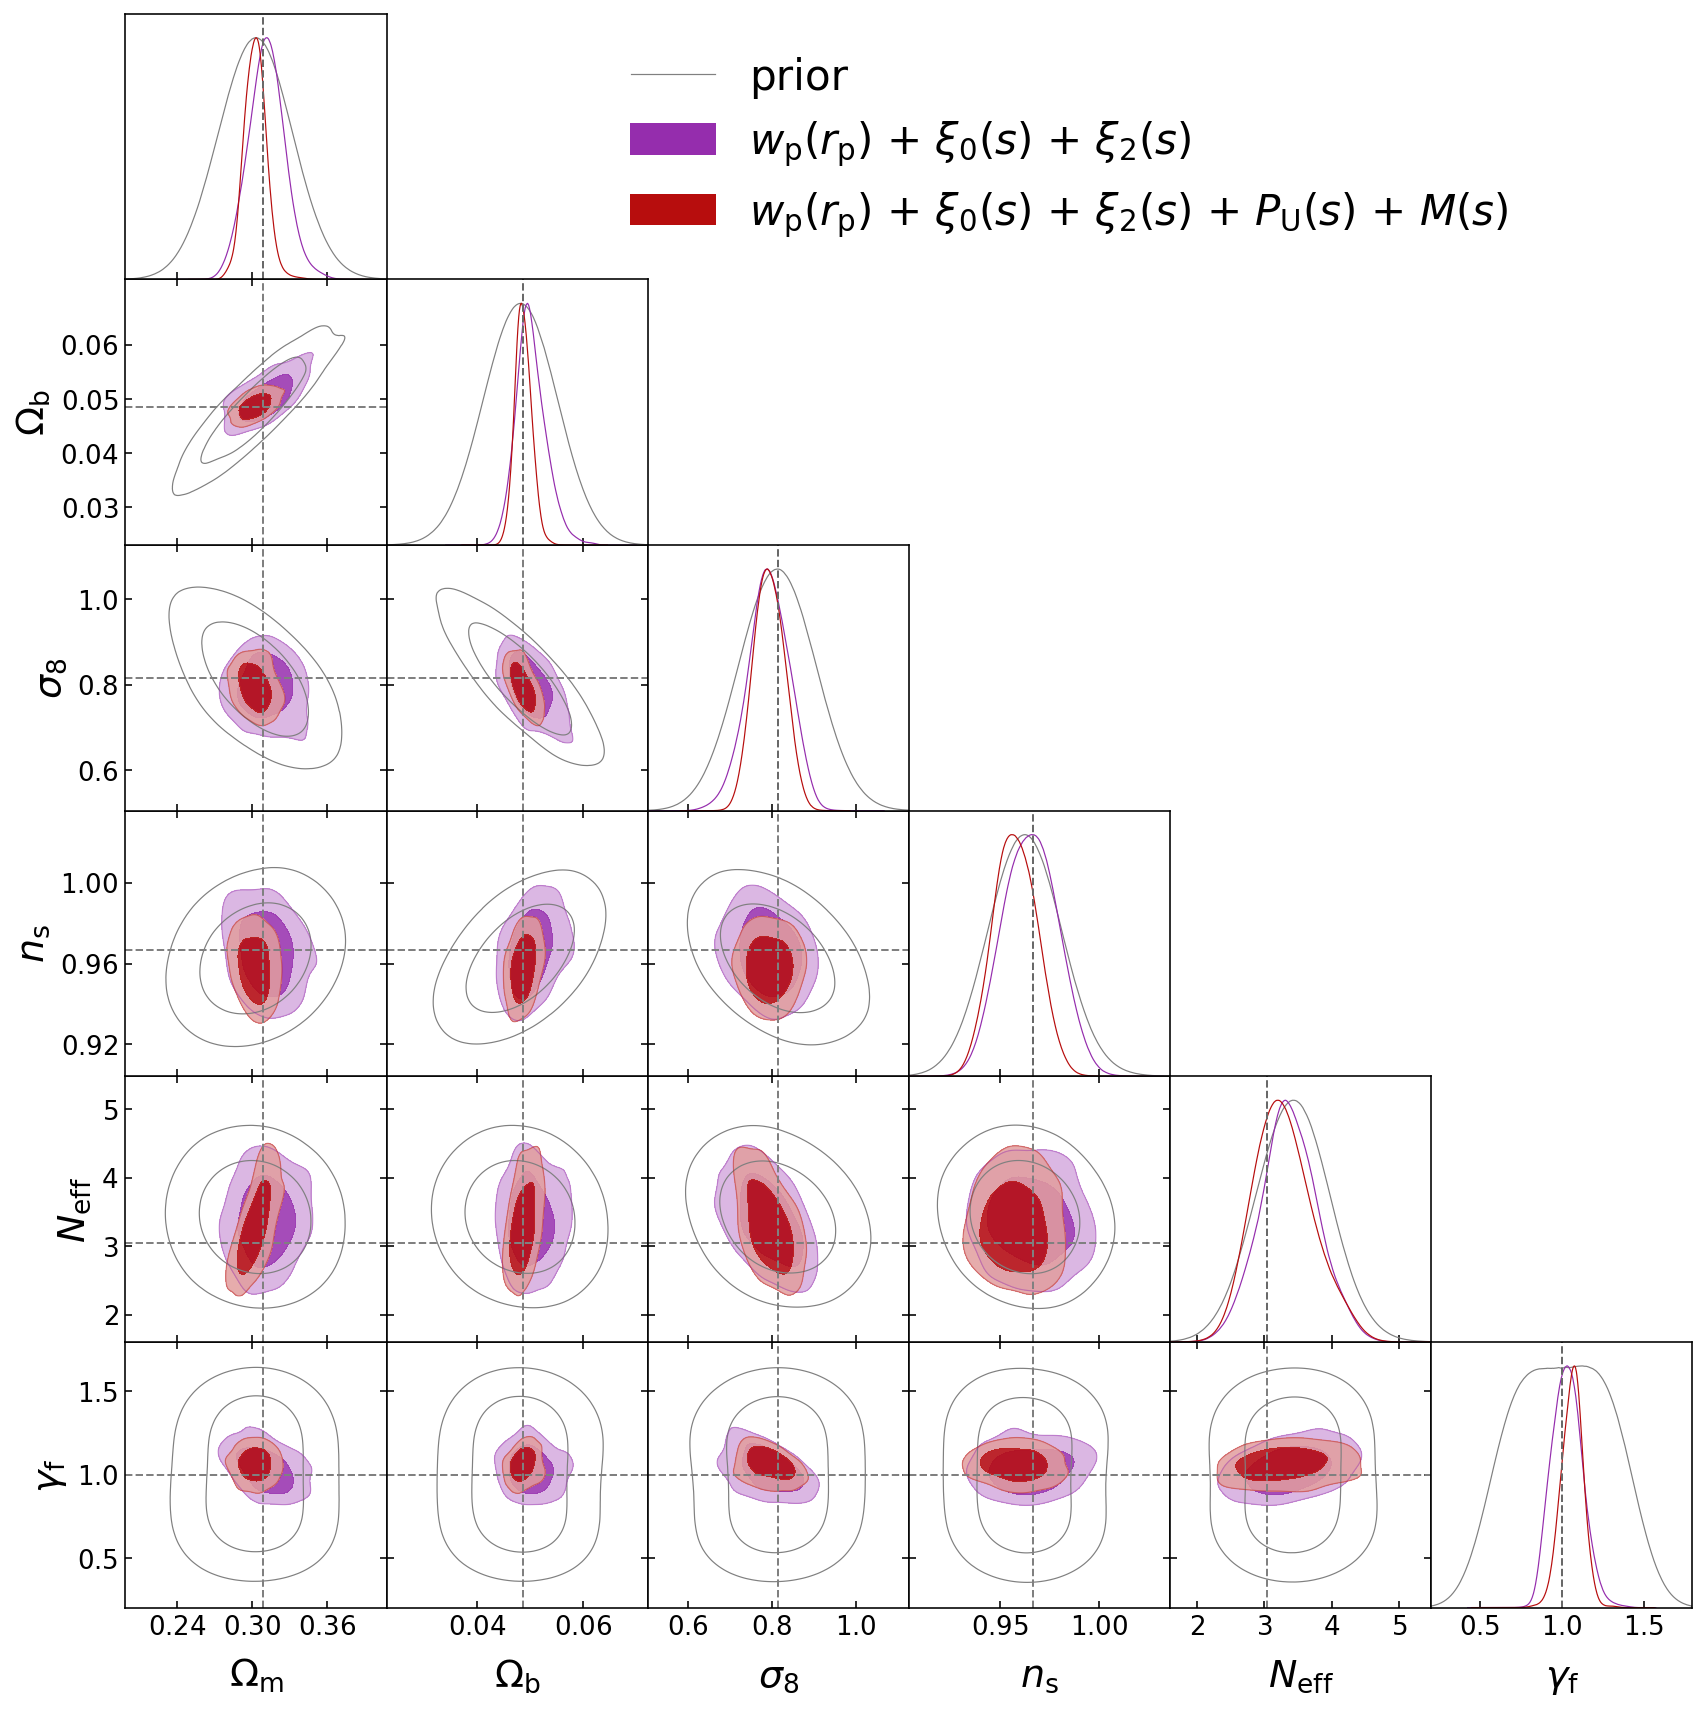

In [72]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_fixwh_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_unit_fixwh_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.85),
                          legend_fontsize=24,
                          alpha=0.85,
                          params_toplot=["Omega_m", "Omega_b", "sigma_8", "n_s", "N_eff", "f"],
                          chaintag_prior='prior')

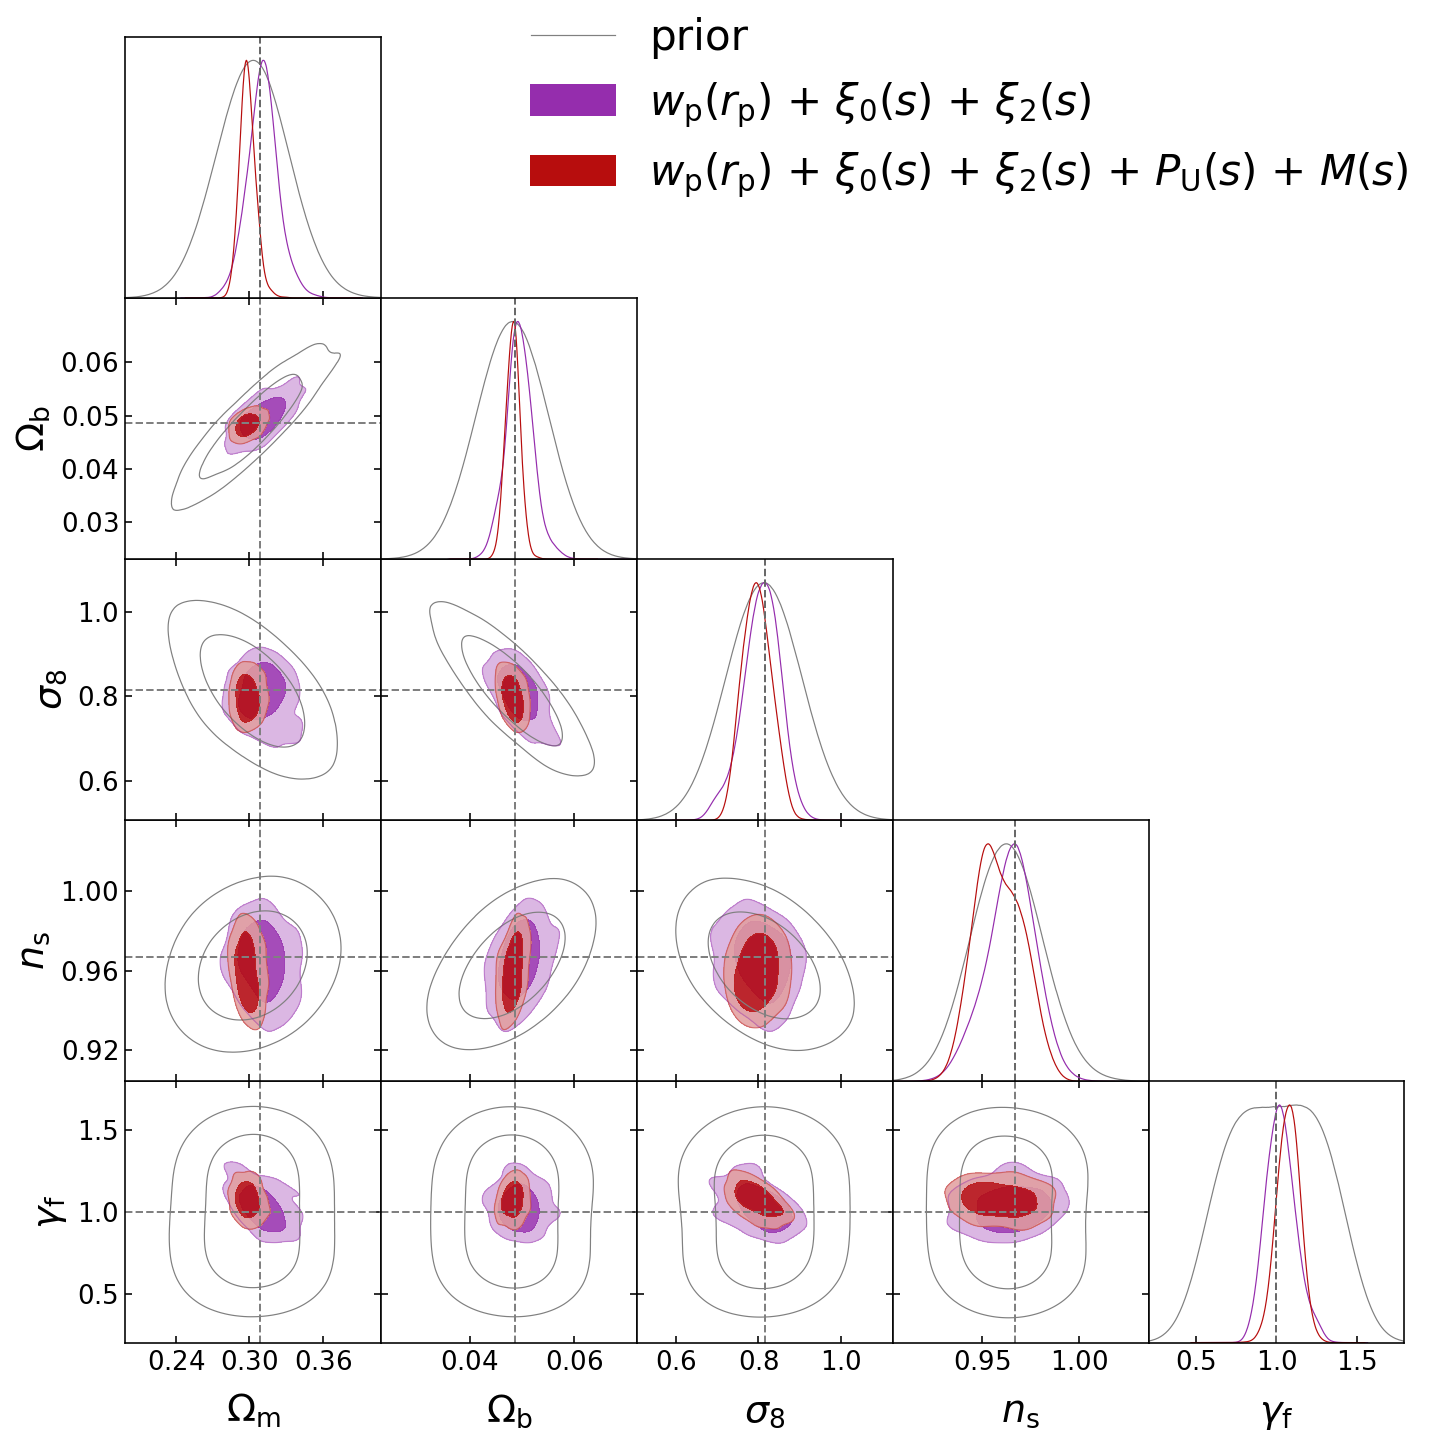

In [73]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_unit_fixwhNeff_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.85),
                          legend_fontsize=24,
                          alpha=0.85,
                          params_toplot=["Omega_m", "Omega_b", "sigma_8", "n_s", "f"],
                          chaintag_prior='prior')

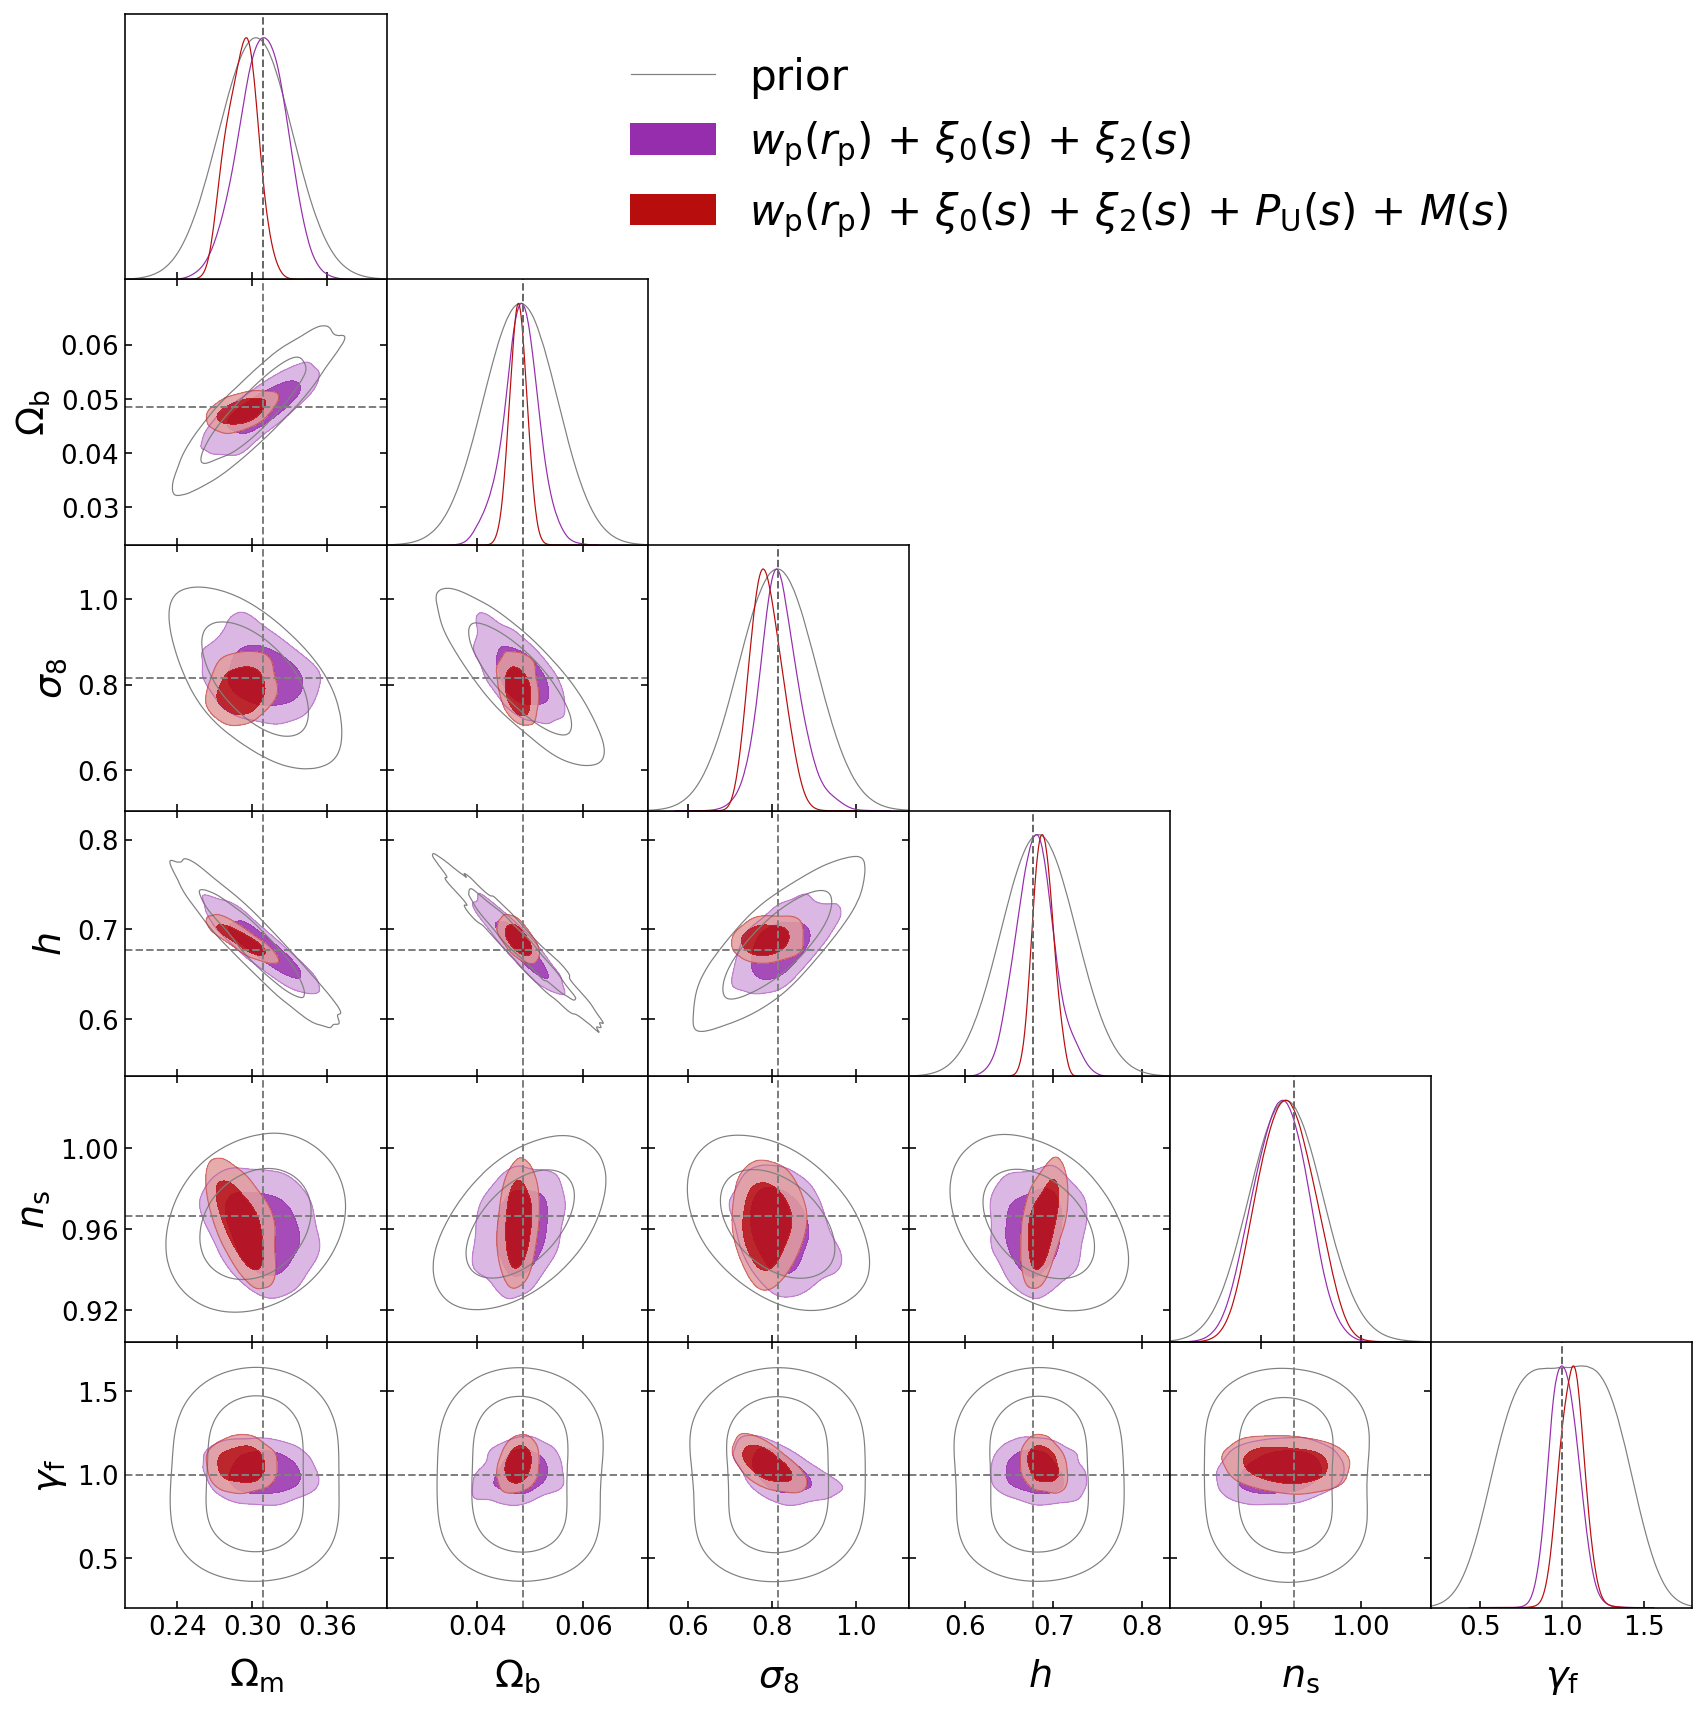

In [74]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_fixwNeff_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_unit_fixwNeff_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.85),
                          legend_fontsize=24,
                          alpha=0.85,
                          params_toplot=["Omega_m", "Omega_b", "sigma_8", "h", "n_s", "f"],
                          chaintag_prior='prior')

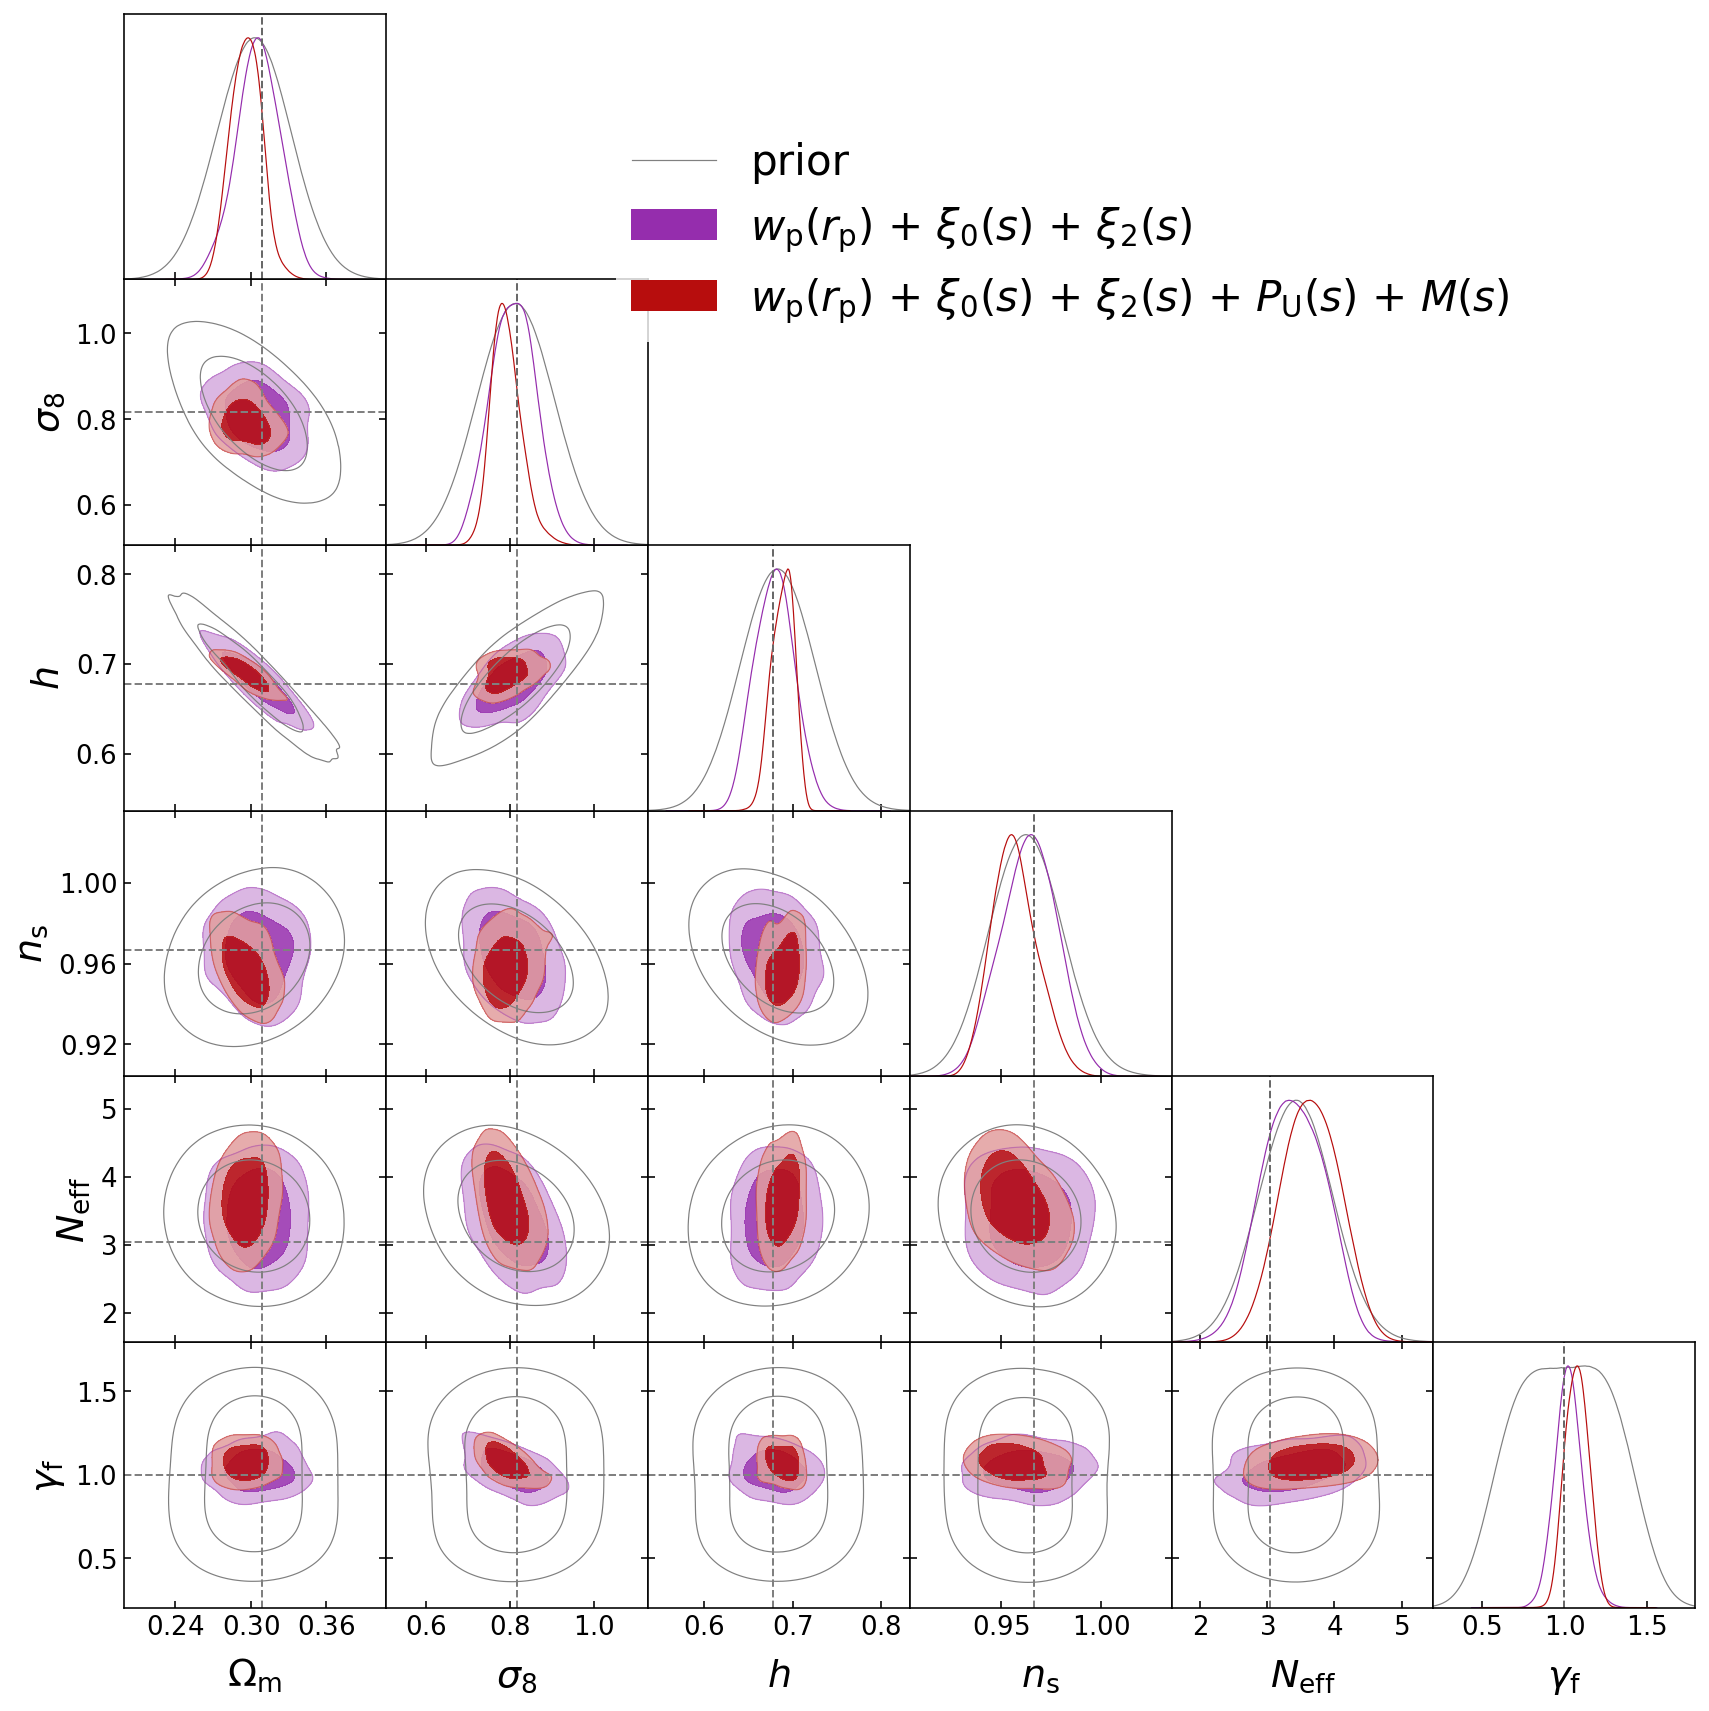

In [75]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_unit_fixwOmegab_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_unit_fixwOmegab_aemulus_fmaxmocks_smoothboth_wpximaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [#colors_addin[0], 
          colors_addin[2],
          colors_addin[4]]
labels = [#labels_addin_full[0], 
          labels_addin_full[2], 
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=["Omega_m", "sigma_8", "h", "n_s", "N_eff", "f"],
                          chaintag_prior='prior',
                          alpha=0.85)